In [39]:
#import packages

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import pingouin as pg
import pandas as pd
import numpy as np
import os
from operator import itemgetter
import seaborn as sns; sns.set(style="ticks", context = "paper", font = "Arial", font_scale = 1.9,
                               palette='colorblind', color_codes = True,
                               rc = {"font.size":7,
                                     "xtick.major.size": 2,
                                     "ytick.major.size": 2})
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import CCFv3 template reference lists of all experimental groups

WT_ctrl_list = pd.read_csv("WT_ctrl_list.csv", index_col = 0)
Tbr1_ctrl_list= pd.read_csv("Tbr1_ctrl_list.csv", index_col = 0)
WT_TBS_list= pd.read_csv("WT_TBS_list.csv", index_col = 0)
Tbr1_TBS_list= pd.read_csv("Tbr1_TBS_list.csv", index_col = 0)

In [3]:
#subset reference list for individual slice comparision

WT_ctrl_oChIEFlist = WT_ctrl_list.drop("022121 Tbr1 wt 3 nost", axis = 1)
Tbr1_ctrl_oChIEFlist = Tbr1_ctrl_list.drop("041821 Tbr1 21 nost", axis = 1)
WT_TBS_oChIEFlist = WT_TBS_list
Tbr1_TBS_oChIEFlist = Tbr1_TBS_list

In [ ]:
#individual oChIEF cfos slice DataFrame function

def oChIEF_cfos_individual_structure_L (genotype, st_pattern, reference_list, structure):
    
    slice_number = []
    cfos_density = []
    cfos_total = []
    area = []
    oChIEF_chance =[]
    sample_name = []
    
    for a in reference_list.columns:

        cfos_L = pd.read_csv ("quantification/"+genotype+"/"+st_pattern+"/"+a+"/rre_cfos_L_summary.csv", index_col = 0)#data will be avaiable after publication
        area_L = pd.read_csv ("quantification/"+genotype+"/"+st_pattern+"/"+a+"/rre_area_L_summary.csv", index_col = 0)#data will be avaiable after publication
        cfos_Ltotal = pd.read_csv ("quantification/"+genotype+"/"+st_pattern+"/"+a+"/rre_cfos_L_num_summary.csv", index_col = 0)#data will be avaiable after publication
        oChIEF_b_L = pd.read_csv ("quantification/"+genotype+"/"+st_pattern+"/"+a+"/rre_oChIEF_L_summary_b.csv", index_col = 0)#data will be avaiable after publication
        cfos_L.columns = reference_list[a][reference_list[a].notnull()].tolist()
        cfos_Ltotal.columns = reference_list[a][reference_list[a].notnull()].tolist()
        cfos_total+=cfos_Ltotal.loc [structure, :][cfos_Ltotal.loc [structure, :].notnull()].tolist()
        area_L.columns = reference_list[a][reference_list[a].notnull()].tolist()
        area+=area_L.loc[structure,:][area_L.loc[structure, :].notnull()].tolist()
        oChIEF_b_L.columns = reference_list[a][reference_list[a].notnull()].tolist()
        cfos_density+=cfos_L.loc [structure, :][cfos_L.loc [structure, :].notnull()].tolist()
        slice_number+=(cfos_L.loc [structure, :][cfos_L.loc [structure, :].notnull()].index).tolist()
        oChIEF_chance+=((oChIEF_b_L.loc[structure, :][oChIEF_b_L.loc[structure, :].notnull()])*100).tolist()
        sample_name+=[a]*len(cfos_Ltotal.loc [structure, :][cfos_Ltotal.loc [structure, :].notnull()].tolist())
    
    oChIEF_real_chance = (np.array(oChIEF_chance)*(3240*4547))/np.array(area)
    oChIEF_cfos_summary = pd.DataFrame (list(zip(slice_number, cfos_density, cfos_total, area, oChIEF_real_chance, sample_name)), 
                                       columns=["slice_number","C-FOS_density (cells/mm^2)", "C-FOS_number", "area(pixels)", "oChIEF_chance (%)", "sample_name"])
    
    oChIEF_cfos_summary["sample_type"] = genotype+"_"+st_pattern
    oChIEF_cfos_summary["structure"] = structure

    return oChIEF_cfos_summary

def oChIEF_cfos_individual_structure_R (genotype, st_pattern, reference_list, structure):
    
    slice_number = []
    cfos_density = []                              
    cfos_total = []    
    area = []
    oChIEF_chance =[]
    sample_name = []
    
    for a in reference_list.columns:

        cfos_L = pd.read_csv ("quantification/"+genotype+"/"+st_pattern+"/"+a+"/rre_cfos_R_summary.csv", index_col = 0)#data will be avaiable after publication
        area_L = pd.read_csv ("quantification/"+genotype+"/"+st_pattern+"/"+a+"/rre_area_R_summary.csv", index_col = 0)#data will be avaiable after publication
        cfos_Ltotal = pd.read_csv ("quantification/"+genotype+"/"+st_pattern+"/"+a+"/rre_cfos_R_num_summary.csv", index_col = 0)#data will be avaiable after publication
        oChIEF_b_L = pd.read_csv ("quantification/"+genotype+"/"+st_pattern+"/"+a+"/rre_oChIEF_R_summary_b.csv", index_col = 0)#data will be avaiable after publication
        cfos_L.columns = reference_list[a][reference_list[a].notnull()].tolist()
        cfos_Ltotal.columns = reference_list[a][reference_list[a].notnull()].tolist()
        oChIEF_b_L.columns = reference_list[a][reference_list[a].notnull()].tolist()
        cfos_density+=cfos_L.loc [structure, :][cfos_L.loc [structure, :].notnull()].tolist()
        cfos_total+=cfos_Ltotal.loc [structure, :][cfos_Ltotal.loc [structure, :].notnull()].tolist()
        area_L.columns = reference_list[a][reference_list[a].notnull()].tolist()
        area+=area_L.loc[structure,:][area_L.loc[structure, :].notnull()].tolist()
        slice_number+=cfos_L.loc [structure,:][cfos_L.loc[structure,:].notnull()].index.tolist()
        oChIEF_chance+=((oChIEF_b_L.loc[structure, :][oChIEF_b_L.loc[structure, :].notnull()])*100).tolist()
        sample_name+=[a]*len(cfos_Ltotal.loc [structure, :][cfos_Ltotal.loc [structure, :].notnull()].tolist())
    
    oChIEF_real_chance = (np.array(oChIEF_chance)*(3240*4547))/np.array(area)
    oChIEF_cfos_summary = pd.DataFrame (list(zip(slice_number, cfos_density, cfos_total, area, oChIEF_real_chance, sample_name)), 
                                       columns=["slice_number","C-FOS_density (cells/mm^2)", "C-FOS_number", "area(pixels)", "oChIEF_chance (%)", "sample_name"])
    
    oChIEF_cfos_summary["sample_type"] = genotype+"_"+st_pattern
    oChIEF_cfos_summary["structure"] = structure
    
    return oChIEF_cfos_summary

In [ ]:
#individual oChIEF cfos slice DataFrame formation

structure_list_parent_v1 = pd.read_csv ("CCFv3/structuretree/structure_list_paper.csv", index_col = 0)
structure_list =  structure_list_parent_v1.LABEL.tolist()

oChIEF_cfos_WT_ctrl_L = pd.DataFrame()
oChIEF_cfos_Tbr1_ctrl_L = pd.DataFrame()
oChIEF_cfos_WT_TBS_L = pd.DataFrame()
oChIEF_cfos_Tbr1_TBS_L = pd.DataFrame()

for a in structure_list:
    WT_ctrl_L = oChIEF_cfos_individual_structure_L ("WT", "ctrl", WT_ctrl_oChIEFlist, a)
    Tbr1_ctrl_L = oChIEF_cfos_individual_structure_L ("Tbr1", "ctrl", Tbr1_ctrl_oChIEFlist, a)
    WT_TBS_L = oChIEF_cfos_individual_structure_L ("WT", "TBS", WT_TBS_oChIEFlist, a)
    Tbr1_TBS_L = oChIEF_cfos_individual_structure_L ("Tbr1", "TBS", Tbr1_TBS_cfoslist, a)
    oChIEF_cfos_WT_ctrl_L = oChIEF_cfos_WT_ctrl_L.append(WT_ctrl_L)
    oChIEF_cfos_Tbr1_ctrl_L = oChIEF_cfos_Tbr1_ctrl_L.append (Tbr1_ctrl_L)
    oChIEF_cfos_WT_TBS_L = oChIEF_cfos_WT_TBS_L.append (WT_TBS_L)
    oChIEF_cfos_Tbr1_TBS_L = oChIEF_cfos_Tbr1_TBS_L.append (Tbr1_TBS_L)
contra_compare = pd.concat ([oChIEF_cfos_WT_ctrl_L, oChIEF_cfos_Tbr1_ctrl_L, oChIEF_cfos_WT_TBS_L, oChIEF_cfos_Tbr1_TBS_L])

oChIEF_cfos_WT_ctrl_R = pd.DataFrame()
oChIEF_cfos_Tbr1_ctrl_R = pd.DataFrame()
oChIEF_cfos_WT_TBS_R = pd.DataFrame()
oChIEF_cfos_Tbr1_TBS_R = pd.DataFrame()

for b in structure_list:
    WT_ctrl_R = oChIEF_cfos_individual_structure_R ("WT", "ctrl", WT_ctrl_oChIEFlist, b)
    Tbr1_ctrl_R = oChIEF_cfos_individual_structure_R ("Tbr1", "ctrl", Tbr1_ctrl_oChIEFlist, b)
    WT_TBS_R = oChIEF_cfos_individual_structure_R ("WT", "TBS", WT_TBS_oChIEFlist, b)
    Tbr1_TBS_R = oChIEF_cfos_individual_structure_R ("Tbr1", "TBS", Tbr1_TBS_cfoslist, b)
    oChIEF_cfos_WT_ctrl_R = oChIEF_cfos_WT_ctrl_R.append(WT_ctrl_R)
    oChIEF_cfos_Tbr1_ctrl_R = oChIEF_cfos_Tbr1_ctrl_R.append (Tbr1_ctrl_R)
    oChIEF_cfos_WT_TBS_R = oChIEF_cfos_WT_TBS_R.append (WT_TBS_R)
    oChIEF_cfos_Tbr1_TBS_R = oChIEF_cfos_Tbr1_TBS_R.append (Tbr1_TBS_R)
ipsi_compare = pd.concat ([oChIEF_cfos_WT_ctrl_R, oChIEF_cfos_Tbr1_ctrl_R, oChIEF_cfos_WT_TBS_R, oChIEF_cfos_Tbr1_TBS_R])

contra_compare.to_csv ("contra_compare_individual_slices.csv")
ipsi_compare.to_csv ("ipsi_compare_individual_slices.csv")

In [4]:
#load individual oChIEF cfos slice DataFrame
contra_compare = pd.read_csv ("contra_compare_individual_slices.csv", index_col = 0)
ipsi_compare = pd.read_csv ("ipsi_compare_individual_slices.csv", index_col = 0)

In [5]:
#binning and shrink individual oChIEF cfos DataFrame
import warnings
warnings.filterwarnings('ignore')

def binning_reset_z (df_u, scale_level_u):    
    """binning C-fos density data in z axis and reset the most posterior z to zero"""
    df_sub = df_u.copy()
    df_sub["slice_number"]//=scale_level_u
    df_sub["slice_number"]*=scale_level_u
    df_sub["slice_number"]= df_sub["slice_number"]-df_sub["slice_number"].min()
    return df_sub
    
contra_compare_bin = binning_reset_z (contra_compare, 10)
ipsi_compare_bin = binning_reset_z (ipsi_compare, 10)

def shrink_df_bin (df_bin, reference_list, sample_type):
    
    shrink_df = pd.DataFrame()
    for a in reference_list.columns:
        df_bin_a = df_bin[df_bin["sample_name"]==a]
        df_bin_a_group = df_bin_a.groupby(["slice_number", "structure"])
        df_bin_a_group_mean = df_bin_a_group.mean()
        df_bin_a_group_mean["sample_name"]=a
        df_bin_a_group_mean["slice_number"] = [n for n, s in df_bin_a_group_mean.index]
        df_bin_a_group_mean["structure"] = [s for n, s in df_bin_a_group_mean.index]
        df_bin_a_group_mean_re = df_bin_a_group_mean.reset_index(drop = True)
        shrink_df = shrink_df.append (df_bin_a_group_mean_re)    
    shrink_df["Group"] = sample_type
    return shrink_df

WT_ctrl_shrink_L = shrink_df_bin(contra_compare_bin, WT_ctrl_oChIEFlist, "WT_ctrl")
Tbr1_ctrl_shrink_L = shrink_df_bin(contra_compare_bin, Tbr1_ctrl_oChIEFlist, "Tbr1_ctrl")
WT_TBS_shrink_L = shrink_df_bin(contra_compare_bin, WT_TBS_oChIEFlist, "WT_TBS")
Tbr1_TBS_shrink_L = shrink_df_bin(contra_compare_bin, Tbr1_TBS_oChIEFlist, "Tbr1_TBS")
contra_compare_bin_shrink = pd.concat ([WT_ctrl_shrink_L, Tbr1_ctrl_shrink_L, WT_TBS_shrink_L, Tbr1_TBS_shrink_L])
contra_compare_bin_shrink["oChIEF_total"]=(contra_compare_bin_shrink["oChIEF_chance (%)"]*contra_compare_bin_shrink["area(pixels)"])/100
WT_ctrl_shrink_R = shrink_df_bin(ipsi_compare_bin, WT_ctrl_oChIEFlist, "WT_ctrl")
Tbr1_ctrl_shrink_R = shrink_df_bin(ipsi_compare_bin, Tbr1_ctrl_oChIEFlist, "Tbr1_ctrl")
WT_TBS_shrink_R = shrink_df_bin(ipsi_compare_bin, WT_TBS_oChIEFlist, "WT_TBS")
Tbr1_TBS_shrink_R = shrink_df_bin(ipsi_compare_bin, Tbr1_TBS_oChIEFlist, "Tbr1_TBS")
ipsi_compare_bin_shrink = pd.concat ([WT_ctrl_shrink_R, Tbr1_ctrl_shrink_R, WT_TBS_shrink_R, Tbr1_TBS_shrink_R])
ipsi_compare_bin_shrink["oChIEF_total"]=(ipsi_compare_bin_shrink["oChIEF_chance (%)"]*ipsi_compare_bin_shrink["area(pixels)"])/100

In [6]:
#Friedman test oChIEF
structure_list_parent_v1 = pd.read_csv ("CCFv3/structuretree/structure_list_paper.csv", index_col = 0)

contra_drop_structure = ["SSp", "SSp-n", "SSp-bfd", "SSp-ll",
                         "SSp-tr","SSp-un", "SSs", "VISam",
                         "cc", "fa", "ec", "ccb", "ccs"]
ipsi_drop_structure = ["SSp", "SSp-n", "SSp-bfd", "SSp-ll", 
                       "SSp-m", "SSp-ul", "SSp-tr","SSp-un", "SSs", "VISam",
                       "LA", "BLA", "BLAa", "BLAp", "BLAv",
                       "cc", "fa", "ec", "ee", "ccg", "fp", "ccb", "ccs"]

contra_oChIEF_structure_list = [s for s in structure_list_parent_v1.LABEL.tolist() if s not in contra_drop_structure]
ipsi_oChIEF_structure_list = [s for s in structure_list_parent_v1.LABEL.tolist() if s not in ipsi_drop_structure]

def Friedman_binning_signal_compare_oChIEF (df_bin, reference_structure_list):


    structure_list = list(set(np.unique(df_bin[df_bin["Group"]=="WT_ctrl"]["structure"])).intersection (set(np.unique(df_bin[df_bin["Group"]=="Tbr1_ctrl"]["structure"]))).intersection(set(np.unique(df_bin[df_bin["Group"]=="WT_TBS"]["structure"]))).intersection(set(np.unique(df_bin[df_bin["Group"]=="Tbr1_TBS"]["structure"]))))
    rearange_structure_list = [s for s in reference_structure_list if s in structure_list]
    structure_statistic_list = []
    w_list = []
    Q_list=[]
    P_list = []
    dof_list =[]
    for a in rearange_structure_list:
        df_structure = df_bin[df_bin["structure"]==a]
        WT_structure = df_structure[df_structure["Group"].isin(["WT_ctrl", "WT_TBS"])]
        WT_structure["genotype"]="WT"
        Tbr1_structure = df_structure[df_structure["Group"].isin(["Tbr1_ctrl", "Tbr1_TBS"])]
        Tbr1_structure["genotype"]="Tbr1"
        df_structure_re = pd.concat([WT_structure, Tbr1_structure])
        
        if (len(np.unique(WT_structure["sample_name"]))==13)&(len(np.unique(Tbr1_structure["sample_name"]))==14)&(sum(df_structure["oChIEF_total"])>(np.std(contra_compare_bin_shrink["oChIEF_total"])*13)):    
            
            aov_table = pg.friedman (dv = "oChIEF_total", within= "genotype", subject = "slice_number", data =df_structure_re, method = "chisq")
            P_list.append (aov_table["p-unc"].values[0])
            w_list.append(aov_table["W"].values[0])
            Q_list.append(aov_table["Q"].values[0])
            dof_list.append(aov_table["ddof1"].values[0])
            structure_statistic_list.append(a)
    Friedman_result = pd.DataFrame ({"structure": structure_statistic_list, 
                                     "Friedman_P": P_list,
                                     "Kendall’s coefficient of concordance": w_list,
                                     "Friedman chi-square statistic":Q_list,
                                     "degrees of freedom":dof_list})
    return Friedman_result

Friedman_contra_compare_oChIEF = Friedman_binning_signal_compare_oChIEF (contra_compare_bin_shrink, contra_oChIEF_structure_list)
Friedman_ipsi_compare_oChIEF = Friedman_binning_signal_compare_oChIEF (ipsi_compare_bin_shrink, ipsi_oChIEF_structure_list)

In [7]:
#add pair-wise oChIEF difference

contra_structure = Friedman_contra_compare_oChIEF["structure"].tolist()
ipsi_structure = Friedman_ipsi_compare_oChIEF["structure"].tolist()

def oChIEF_difference_slice_general (WT_df, Tbr1_df):
    nost_cfos_list = []
    nost_sample_name = []
    TBS_cfos_list = []
    TBS_sample_name = []
    for a in list(np.unique(WT_df["sample_name"])):
        nost_cfos = (WT_df[WT_df["sample_name"]==a]["oChIEF_total"])
        nost_cfos_list.append(nost_cfos.tolist())
        nost_sample_name.append(a)
    for b in list(np.unique(Tbr1_df["sample_name"])):
        TBS_cfos = (Tbr1_df[Tbr1_df["sample_name"]==b]["oChIEF_total"])
        TBS_cfos_list.append(TBS_cfos.tolist())
        TBS_sample_name.append(b)
    dif_list = []
    for c in TBS_cfos_list:
        for d in nost_cfos_list:
            if len(c)==len(d):
                dif = np.array(c)-np.array(d)
                dif_list.append(dif)
            elif len(c)<len(d):
                dif = np.array(c)-np.array(d[:len(c)])
                dif_list.append(dif)
            elif len(c)>len(d):
                dif = np.array(c[:len(d)])-np.array(d[:len(c)])
                dif_list.append(dif)
    dif_name_list = []
    for e in TBS_sample_name:
        for f in nost_sample_name:
            dif_name = e+"-"+f
            dif_name_list.append(dif_name)
    oChIEF_difference = pd.DataFrame(dif_list, index = dif_name_list)
    return oChIEF_difference

def pair_wise_dif_oChIEF (df_bin, Friedman_df, oChIEF_structure_list_dif):

    for a in oChIEF_structure_list_dif:
        df_structure = df_bin[df_bin["structure"]==a]  
        WT_structure = df_structure[df_structure["Group"].isin(["WT_ctrl", "WT_TBS"])]
        Tbr1_structure = df_structure[df_structure["Group"].isin(["Tbr1_ctrl", "Tbr1_TBS"])]

        dif_WT_Tbr1 = oChIEF_difference_slice_general(WT_structure, Tbr1_structure)

        Friedman_df.loc[Friedman_df[Friedman_df["structure"]==a].index, "pair diff Tbr1–WT"] = sum(dif_WT_Tbr1.mean(axis=0))
        
    return Friedman_df
 
Friedman_contra_compare_oChIEF_diff = pair_wise_dif_oChIEF (contra_compare_bin_shrink, Friedman_contra_compare_oChIEF, contra_structure)
Friedman_ipsi_compare_oChIEF_diff = pair_wise_dif_oChIEF (ipsi_compare_bin_shrink, Friedman_ipsi_compare_oChIEF, ipsi_structure)


In [8]:
#compare volume_based and slice based quantification of oChIEF
volume_based_analysis = pd.read_csv("table_s1.csv", index_col=0)

U_contra_list = volume_based_analysis["Contra. volume-based analysis oChIEF U test P value"].dropna().index.tolist()
U_ipsi_list = volume_based_analysis["Ipsi. volume-based analysis oChIEF U test P value"].dropna().index.tolist()

contra_compare_structure = list(set(Friedman_contra_compare_oChIEF_diff["structure"].tolist()).intersection(set(U_contra_list)))
ipsi_compare_structure = list(set(Friedman_ipsi_compare_oChIEF_diff["structure"].tolist()).intersection(set(U_ipsi_list)))


U_contra_oChIEF = volume_based_analysis.loc[contra_compare_structure, ["Contra. volume-based analysis Relative oChIEF density(% of WT average)",
                                                                       "Contra. volume-based analysis oChIEF U test P value"]]
U_contra_oChIEF["structure"]= U_contra_oChIEF.index.tolist()
U_ipsi_oChIEF = volume_based_analysis.loc[ipsi_compare_structure, ["Ipsi. volume-based analysis Relative oChIEF density(% of WT average)",
                                                                       "Ipsi. volume-based analysis oChIEF U test P value"]]
U_ipsi_oChIEF["structure"]= U_ipsi_oChIEF.index.tolist()

Friedman_contra_oChIEF = Friedman_contra_compare_oChIEF_diff[Friedman_contra_compare_oChIEF_diff["structure"].isin(contra_compare_structure)]
Friedman_ipsi_oChIEF = Friedman_ipsi_compare_oChIEF_diff[Friedman_ipsi_compare_oChIEF_diff["structure"].isin(ipsi_compare_structure)]

#format color dict
def structure_color_dict (df):
    """construct structure color map"""
    cfos_structure_list = list(df["structure"])
    label_list = list(structure_list_parent_v1["LABEL"])
    label_dict = {si : i for i,si in enumerate(label_list)}
    index_list = list(itemgetter(*cfos_structure_list)(label_dict))
    color_list = structure_list_parent_v1.iloc[index_list][['-R-','-G-','-B-']]
    color_tuple = [tuple(x) for x in color_list.to_numpy()]
    color_code = ['#%02x%02x%02x' % (x) for x in color_tuple]
    structure_zip = zip(cfos_structure_list, color_code)
    structure_dict = dict(structure_zip)
    
    return structure_dict

contra_color_dict = structure_color_dict (U_contra_oChIEF)
ipsi_color_dict = structure_color_dict (U_ipsi_oChIEF)

#add ROI correction
structure_list_L = ["LA", "BLA", "amc", "VISam", "CP", "AI", "VISC", "ORBvl", "TEa", "AIp", "ORBl", "ACAd", "BLAa",
                    "AUD", "ACAv", "PL", "ILA", "RSPv", "RSPd", "RSPagl", "VISa", "MOs", "SSp-tr", "SSp-ll", "act", "ORBm", "PP",
                    "CM", "RH", "PCN", "PF", "CL", "PIL", "AUDd", "AUDv", "PVpo",
                    "RSP", "ORB", "ACA", "ILM", "AId", "VTA", "RE", "BLAp"]

structure_list_R = ["LA", "BLA", "ORBvl", "PBG", "SAG", "FRP", "APr", "VISam", "scp", "CP", "AI", "VISC", "TEa", "AIp", "ORBl", "ACAd", "BLAa",
                    "AUD", "ORBm", "ACAv", "PL", "ILA", "RSPv", "RSPd", "RSPagl", "VISa", "MOs", "SSp-tr", "SSp-ll", "PPN", "PP", "RCH", "ORBm",
                    "CM", "RH", "PCN", "PF", "CL", "PIL", "AUDd", "AUDv", "DG", "VTA",
                    "RSP", "ORB", "ACA", "ILM", "AId", "PVpo", "RE"]

U_contra_oChIEF["ROI correction"]="No"
U_ipsi_oChIEF["ROI correction"]="No"
Friedman_contra_oChIEF["ROI correction"]="No"
Friedman_ipsi_oChIEF["ROI correction"]="No"

for a in U_contra_oChIEF.structure:
    if a in structure_list_L:
        U_contra_oChIEF["ROI correction"][a] = "Yes"
        
for b in U_ipsi_oChIEF.structure:
    if b in structure_list_R:
        U_ipsi_oChIEF["ROI correction"][b] = "Yes"
        
for c in Friedman_contra_oChIEF.structure:
    if c in structure_list_L:
        Friedman_contra_oChIEF.loc[Friedman_contra_oChIEF[Friedman_contra_oChIEF["structure"]==c].index,"ROI correction"] = "Yes"
        
for d in Friedman_ipsi_oChIEF.structure:
    if d in structure_list_R:
        Friedman_ipsi_oChIEF.loc[Friedman_ipsi_oChIEF[Friedman_ipsi_oChIEF["structure"]==d].index, "ROI correction"] = "Yes"

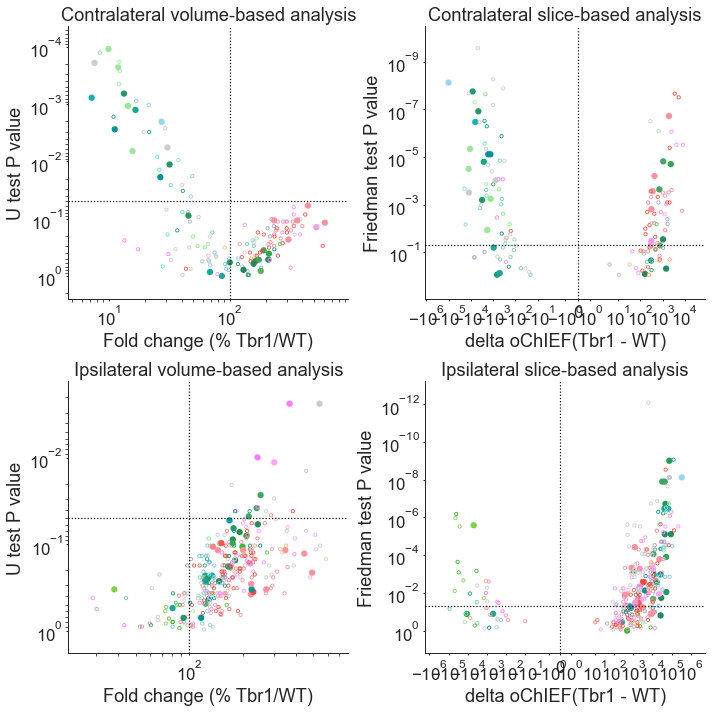

In [9]:
#plot compare volume_based and slice based quantification of oChIEF ("Figure s8a, b")

markers = {"Yes": "o", "No": "$\circ$"}

plt.figure (figsize = (10,10))

plt.subplot (2, 2, 1)
ax = sns.scatterplot (data = U_contra_oChIEF, 
                     x = "Contra. volume-based analysis Relative oChIEF density(% of WT average)",
                     y = "Contra. volume-based analysis oChIEF U test P value", 
                     hue = "structure",
                     palette = contra_color_dict,
                     style = "ROI correction",
                     markers = markers,
                     legend = False, 
                     s = 40,
                     linewidth=0)
plt.ylabel ("U test P value")
plt.xlabel ("Fold change (% Tbr1/WT)")
plt.axhline(y=0.05, color='black', linestyle=':')
plt.axvline(x=100, color='black', linestyle=':')
plt.title ("Contralateral volume-based analysis")
ax.invert_yaxis()
ax.set_yscale("log")
ax.set_xscale("log")
ax.margins(0.1)

plt.subplot (2, 2, 2)
ax = sns.scatterplot (data = Friedman_contra_oChIEF, 
                     x = "pair diff Tbr1–WT",
                     y = "Friedman_P", 
                     hue = "structure",
                     palette = contra_color_dict,
                     style = "ROI correction",
                     markers = markers,
                     legend = False, 
                     s = 40,
                     linewidth=0)
plt.ylabel ("Friedman test P value")
plt.xlabel ("delta oChIEF(Tbr1 - WT)")
plt.axhline(y=0.05, color='black', linestyle=':')
plt.axvline(x=0, color='black', linestyle=':')
plt.title ("Contralateral slice-based analysis")
ax.invert_yaxis()
ax.set_yscale("log")
ax.set_xscale("symlog")
ax.margins(0.1)

plt.subplot (2, 2, 3)
ax = sns.scatterplot (data = U_ipsi_oChIEF, 
                     x = "Ipsi. volume-based analysis Relative oChIEF density(% of WT average)",
                     y = "Ipsi. volume-based analysis oChIEF U test P value", 
                     hue = "structure",
                     palette = ipsi_color_dict,
                     style = "ROI correction",
                     markers = markers,
                     legend = False, 
                     s  = 40,
                     linewidth=0)
plt.ylabel ("U test P value")
plt.xlabel ("Fold change (% Tbr1/WT)")
plt.axhline(y=0.05, color='black', linestyle=':')
plt.axvline(x=100, color='black', linestyle=':')
plt.title ("Ipsilateral volume-based analysis")
ax.invert_yaxis()
ax.set_yscale("log")
ax.set_xscale("log")
ax.margins(0.1)

plt.subplot (2, 2, 4)
ax = sns.scatterplot (data = Friedman_ipsi_oChIEF, 
                     x = "pair diff Tbr1–WT",
                     y = "Friedman_P", 
                     hue = "structure",
                     palette = ipsi_color_dict,
                     style = "ROI correction",
                     markers = markers,
                     legend = False, 
                     s = 40,
                     linewidth=0)
plt.ylabel ("Friedman test P value")
plt.xlabel ("delta oChIEF(Tbr1 - WT)")
plt.axhline(y=0.05, color='black', linestyle=':')
plt.axvline(x=0, color='black', linestyle=':')
plt.title ("Ipsilateral slice-based analysis")
ax.invert_yaxis()
ax.set_yscale("log")
ax.set_xscale("symlog")
ax.margins(0.1)
plt.tight_layout()
sns.despine()
plt.show()

In [10]:
#Friedman test cfos

cfos_structure_list = pd.read_csv ("CCFv3/structuretree/structure_list_paper_cfos.csv", index_col = 0).LABEL.tolist()

def Friedman_binning_signal_compare_cfos (df_bin, reference_structure_list):


    structure_list = list(set(np.unique(df_bin[df_bin["Group"]=="WT_ctrl"]["structure"])).intersection (set(np.unique(df_bin[df_bin["Group"]=="Tbr1_ctrl"]["structure"]))).intersection(set(np.unique(df_bin[df_bin["Group"]=="WT_TBS"]["structure"]))).intersection(set(np.unique(df_bin[df_bin["Group"]=="Tbr1_TBS"]["structure"]))))
    rearange_structure_list = [s for s in reference_structure_list if s in structure_list]
    structure_statistic_list = []
    w_list = []
    Q_list=[]
    P_list = []
    dof_list =[]
    
    

    for a in rearange_structure_list:
        df_structure = df_bin[df_bin["structure"]==a]
        WT_ctrl_structure = df_structure[df_structure["Group"]=="WT_ctrl"]
        Tbr1_ctrl_structure = df_structure[df_structure["Group"]=="Tbr1_ctrl"]
        WT_TBS_structure = df_structure[df_structure["Group"]=="WT_TBS"]
        Tbr1_TBS_structure = df_structure[df_structure["Group"]=="Tbr1_TBS"]
        
        if (len(np.unique(WT_ctrl_structure["sample_name"]))==6)&(len(np.unique(Tbr1_ctrl_structure["sample_name"]))==7)&(len(np.unique(WT_TBS_structure["sample_name"]))==7)&(len(np.unique(Tbr1_TBS_structure["sample_name"]))==7)&(sum(df_structure["C-FOS_number"])>100):    
            
            aov_table = pg.friedman (dv = "C-FOS_number", within= "Group", subject = "slice_number", data =df_structure, method = "chisq")
            
            P_list.append (aov_table["p-unc"].values[0])
            w_list.append(aov_table["W"].values[0])
            Q_list.append(aov_table["Q"].values[0])
            dof_list.append(aov_table["ddof1"].values[0])
            structure_statistic_list.append(a)
                            
    Friedman_result = pd.DataFrame ({"structure": structure_statistic_list, 
                                     "Friedman_P": P_list,
                                     "Kendall’s coefficient of concordance": w_list,
                                     "Friedman chi-square statistic":Q_list,
                                     "degrees of freedom":dof_list}, index = structure_statistic_list)
    return Friedman_result

Friedman_contra_compare_cfos = Friedman_binning_signal_compare_cfos (contra_compare_bin_shrink, cfos_structure_list)
Friedman_ipsi_compare_cfos = Friedman_binning_signal_compare_cfos (ipsi_compare_bin_shrink, cfos_structure_list)

In [11]:
#add post-hoc analysis of C-FOS

def post_hoc_analysis_cfos (df_bin, Friedman_df):
    
    structure_list = Friedman_df.index.tolist()
    
    for a in structure_list:
        if a in list(Friedman_df[Friedman_df["Friedman_P"]<0.05]["structure"]):
            df_structure = df_bin[df_bin["structure"]==a]
            pair_table = pg.pairwise_tests (dv = "C-FOS_number", within = ["Group"], 
                                        subject = "slice_number",
                                        data = df_structure,
                                        correction = "True",
                                        padjust = "bonf",
                                        parametric = False)
            Friedman_df.loc[a, "P WT ctrl vs.Tbr1 ctrl"] = pair_table["p-corr"][4]
            Friedman_df.loc[a, "W-val WT ctrl vs.Tbr1 ctrl"] = pair_table["W-val"][4]
            Friedman_df.loc[a, "hedges WT ctrl vs.Tbr1 ctrl"] = pair_table["hedges"][4]

            Friedman_df.loc[a, "P WT ctrl vs.WT TBS"] = pair_table["p-corr"][5]
            Friedman_df.loc[a, "W-val WT ctrl vs.WT TBS"] = pair_table["W-val"][5]
            Friedman_df.loc[a, "hedges WT ctrl vs.WT TBS"] = pair_table["hedges"][5]

            Friedman_df.loc[a, "P Tbr1 ctrl vs.Tbr1 TBS"] = pair_table["p-corr"][0]
            Friedman_df.loc[a, "W-val Tbr1 ctrl vs.Tbr1 TBS"] = pair_table["W-val"][0]
            Friedman_df.loc[a, "hedges Tbr1 ctrl vs.Tbr1 TBS"] = pair_table["hedges"][0]

            Friedman_df.loc[a, "P WT TBS vs.Tbr1 TBS"] = pair_table["p-corr"][1]
            Friedman_df.loc[a, "W-val WT TBS vs.Tbr1 TBS"] = pair_table["W-val"][1]
            Friedman_df.loc[a, "hedges WT TBS vs.Tbr1 TBS"] = pair_table["hedges"][1]
    return Friedman_df

Friedman_contra_compare_cfos_post = post_hoc_analysis_cfos(contra_compare_bin_shrink, Friedman_contra_compare_cfos)
Friedman_ipsi_compare_cfos_post = post_hoc_analysis_cfos(ipsi_compare_bin_shrink, Friedman_ipsi_compare_cfos)

In [12]:
#add pair-wise subtraction cfos(df2-df1)

def cfos_difference_slice_general (df1, df2):
    nost_cfos_list = []
    nost_sample_name = []
    TBS_cfos_list = []
    TBS_sample_name = []
    for a in list(np.unique(df1["sample_name"])):
        nost_cfos = (df1[df1["sample_name"]==a]["C-FOS_number"])
        nost_cfos_list.append(nost_cfos.tolist())
        nost_sample_name.append(a)
    for b in list(np.unique(df2["sample_name"])):
        TBS_cfos = (df2[df2["sample_name"]==b]["C-FOS_number"])
        TBS_cfos_list.append(TBS_cfos.tolist())
        TBS_sample_name.append(b)
    dif_list = []
    for c in TBS_cfos_list:
        for d in nost_cfos_list:
            if len(c)==len(d):
                dif = np.array(c)-np.array(d)
                dif_list.append(dif)
            elif len(c)<len(d):
                dif = np.array(c)-np.array(d[:len(c)])
                dif_list.append(dif)
            elif len(c)>len(d):
                dif = np.array(c[:len(d)])-np.array(d[:len(c)])
                dif_list.append(dif)
    dif_name_list = []
    for e in TBS_sample_name:
        for f in nost_sample_name:
            dif_name = e+"-"+f
            dif_name_list.append(dif_name)
    cfos_difference = pd.DataFrame(dif_list, index = dif_name_list)
    return cfos_difference

def pair_wise_dif_cfos (df_bin, Friedman_df):
    
    structure_list = Friedman_df.index.tolist()

    for a in structure_list:
        df_structure = df_bin[df_bin["structure"]==a]  
        WT_ctrl_cfos= df_structure[df_structure["Group"]=="WT_ctrl"]
        Tbr1_ctrl_cfos= df_structure[df_structure["Group"]=="Tbr1_ctrl"]
        WT_TBS_cfos= df_structure[df_structure["Group"]=="WT_TBS"]
        Tbr1_TBS_cfos= df_structure[df_structure["Group"]=="Tbr1_TBS"]

        dif_WT_Tbr1_ctrl = cfos_difference_slice_general(WT_ctrl_cfos, Tbr1_ctrl_cfos)
        dif_WT_WT_TBS = cfos_difference_slice_general(WT_ctrl_cfos, WT_TBS_cfos)
        dif_Tbr1_Tbr1_TBS = cfos_difference_slice_general(Tbr1_ctrl_cfos, Tbr1_TBS_cfos)
        dif_WT_Tbr1_TBS = cfos_difference_slice_general(WT_TBS_cfos, Tbr1_TBS_cfos)


        Friedman_df.loc[a, "Tbr1 mut ctrl vs.WT ctrl"] = sum(dif_WT_Tbr1_ctrl.mean(axis=0))
        Friedman_df.loc[a, "WT TBS vs.WT ctrl"] = sum(dif_WT_WT_TBS.mean(axis=0))
        Friedman_df.loc[a, "Tbr1 mut TBS vs.Tbr1 mut ctrl"] = sum(dif_Tbr1_Tbr1_TBS.mean(axis=0))
        Friedman_df.loc[a, "Tbr1 mut TBS vs.WT TBS"] = sum(dif_WT_Tbr1_TBS.mean(axis=0))
        
    return Friedman_df

Friedman_contra_compare_cfos_post_dif = pair_wise_dif_cfos(contra_compare_bin_shrink, Friedman_contra_compare_cfos_post)
Friedman_ipsi_compare_cfos_post_dif = pair_wise_dif_cfos(ipsi_compare_bin_shrink, Friedman_ipsi_compare_cfos_post)

In [13]:
#add information to Friedman cfos DataFrame

#format color dict
def structure_color_dict (df):
    """construct structure color map"""
    cfos_structure_list = list(df["structure"])
    label_list = list(structure_list_parent_v1["LABEL"])
    label_dict = {si : i for i,si in enumerate(label_list)}
    index_list = list(itemgetter(*cfos_structure_list)(label_dict))
    color_list = structure_list_parent_v1.iloc[index_list][['-R-','-G-','-B-']]
    color_tuple = [tuple(x) for x in color_list.to_numpy()]
    color_code = ['#%02x%02x%02x' % (x) for x in color_tuple]
    structure_zip = zip(cfos_structure_list, color_code)
    structure_dict = dict(structure_zip)
    
    return structure_dict

contra_cfos_color_dict = structure_color_dict (Friedman_contra_compare_cfos_post_dif)
ipsi_cfos_color_dict = structure_color_dict (Friedman_contra_compare_cfos_post_dif)

#add major brain areas
structure_list_parent_v1 = pd.read_csv ("CCFv3/structuretree/structure_list_paper_cfos.csv", index_col = 0)
Friedman_contra_compare_cfos_post_dif["ancestor_structure"] = structure_list_parent_v1[structure_list_parent_v1["LABEL"].isin(Friedman_contra_compare_cfos_post_dif["structure"].tolist())]["ancestor_structure"].tolist()
Friedman_ipsi_compare_cfos_post_dif["ancestor_structure"] = structure_list_parent_v1[structure_list_parent_v1["LABEL"].isin(Friedman_ipsi_compare_cfos_post_dif["structure"].tolist())]["ancestor_structure"].tolist()

#add ROI correction
structure_list_L = ["LA", "BLA", "amc", "VISam", "CP", "AI", "VISC", "ORBvl", "TEa", "AIp", "ORBl", "ACAd", "BLAa",
                    "AUD", "ACAv", "PL", "ILA", "RSPv", "RSPd", "RSPagl", "VISa", "MOs", "SSp-tr", "SSp-ll", "act", "ORBm", "PP",
                    "CM", "RH", "PCN", "PF", "CL", "PIL", "AUDd", "AUDv", "PVpo",
                    "RSP", "ORB", "ACA", "ILM", "AId", "VTA", "RE", "BLAp"]

structure_list_R = ["LA", "BLA", "ORBvl", "PBG", "SAG", "FRP", "APr", "VISam", "scp", "CP", "AI", "VISC", "TEa", "AIp", "ORBl", "ACAd", "BLAa",
                    "AUD", "ORBm", "ACAv", "PL", "ILA", "RSPv", "RSPd", "RSPagl", "VISa", "MOs", "SSp-tr", "SSp-ll", "PPN", "PP", "RCH", "ORBm",
                    "CM", "RH", "PCN", "PF", "CL", "PIL", "AUDd", "AUDv", "DG", "VTA",
                    "RSP", "ORB", "ACA", "ILM", "AId", "PVpo", "RE"]

Friedman_contra_compare_cfos_post_dif["ROI correction"]="No"
Friedman_ipsi_compare_cfos_post_dif["ROI correction"]="No"

for a in Friedman_contra_compare_cfos_post_dif.index:
    if a in structure_list_L:
        Friedman_contra_compare_cfos_post_dif.loc[a, "ROI correction"]="Yes"

for b in Friedman_ipsi_compare_cfos_post_dif.index:
    if b in structure_list_R:
        Friedman_ipsi_compare_cfos_post_dif.loc[b, "ROI correction"]="Yes"

In [14]:
#formation of representative binning C-FOS distribution DataFrame

cfos_structure_list = pd.read_csv ("CCFv3/structuretree/structure_list_paper_cfos.csv", index_col = 0).LABEL.tolist()

def plot_binning_cfos_slice_mean (df, reference_structure_list, scale_level):
    """plot binning cfos density data in z axis for particular structure"""
        
    structure_list = [a for a in cfos_structure_list if a in df["structure"].tolist()]
      
    df_copy = df.copy()
    df_copy.drop(["sample_name"], axis = 1, inplace = True)
    WT_ctrl_compare = df_copy[df_copy["Group"]=="WT_ctrl"]
    Tbr1_ctrl_compare = df_copy[df_copy["Group"]=="Tbr1_ctrl"]
    WT_TBS_compare = df_copy[df_copy["Group"]=="WT_TBS"]
    Tbr1_TBS_compare = df_copy[df_copy["Group"]=="Tbr1_TBS"]


    def binning_reset_z (df_u, structure_u, scale_level_u):
        """binning C-fos density data in z axis and reset the most posterior z to zero"""
        df_sub = df_u[df_u["structure"]== structure_u]
        df_sub["slice_number"]//=scale_level_u
        df_sub["slice_number"]*=scale_level_u
        df_sub_group = df_sub.groupby(["slice_number"])
        mean = df_sub_group.mean()["C-FOS_number"].tolist()
        return mean
    
    WT_ctrl = []
    Tbr1_ctrl =[]
    WT_TBS = []
    Tbr1_TBS = []    
    for a in structure_list:
        WT_ctrl.append(binning_reset_z (WT_ctrl_compare, a, scale_level))
        Tbr1_ctrl.append(binning_reset_z (Tbr1_ctrl_compare, a, scale_level))
        WT_TBS.append(binning_reset_z (WT_TBS_compare, a, scale_level))
        Tbr1_TBS.append(binning_reset_z (Tbr1_TBS_compare, a, scale_level))
        
    WT_ctrl_df = pd.DataFrame (WT_ctrl, index = structure_list)
    Tbr1_ctrl_df = pd.DataFrame (Tbr1_ctrl, index = structure_list)
    WT_TBS_df = pd.DataFrame (WT_TBS, index = structure_list)
    Tbr1_TBS_df = pd.DataFrame (Tbr1_TBS, index = structure_list)
    
    
    return WT_ctrl_df, Tbr1_ctrl_df, WT_TBS_df, Tbr1_TBS_df

WT_ctrl_contra_df, Tbr1_ctrl_contra_df, WT_TBS_contra_df, Tbr1_TBS_contra_df = plot_binning_cfos_slice_mean (contra_compare_bin_shrink, cfos_structure_list, 10)
WT_ctrl_ipsi_df, Tbr1_ctrl_ipsi_df, WT_TBS_ipsi_df, Tbr1_TBS_ipsi_df = plot_binning_cfos_slice_mean (ipsi_compare_bin_shrink, cfos_structure_list, 10)

([<matplotlib.axis.XTick at 0x2856a4b80>,
 [])

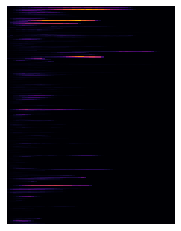

In [15]:
##plot representative binning C-FOS distribution heatmap
#Example: Figure 3a upper left panel

#subset representative binning C-FOS distribution 
contra_structure_list = [a for a in Friedman_contra_compare_cfos_post_dif["structure"].tolist()]
WT_ctrl_contra_df = WT_ctrl_contra_df.loc[contra_structure_list]

#plot heatmap
plt.figure (figsize = (3,4))

sns.heatmap(WT_ctrl_contra_df.fillna(0), cmap = "inferno", vmin = 0, vmax=2000, cbar=False)

plt.ylabel("")
ax = plt.gca()
ax.tick_params(labelleft=False, left = False, labelbottom = False, bottom = False)
new_xticks = np.linspace(0, 50, 3)
plt.xticks(new_xticks,[0,2000,4000], rotation=0)

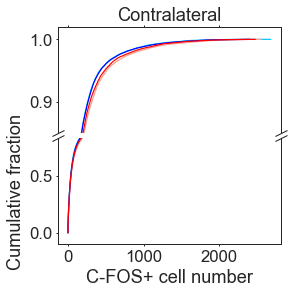

In [16]:
#plot cumulative plots of binnized C-FOS positive cell distribution 
#Example: Figure 3b upper panel

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

WT_ctrl_contra_x, WT_ctrl_contra_y = ecdf(contra_compare_bin_shrink[(contra_compare_bin_shrink["Group"]=="WT_ctrl")&(contra_compare_bin_shrink["structure"].isin(contra_structure_list))]["C-FOS_number"].tolist())
Tbr1_ctrl_contra_x, Tbr1_ctrl_contra_y = ecdf(contra_compare_bin_shrink[(contra_compare_bin_shrink["Group"]=="Tbr1_ctrl")&(contra_compare_bin_shrink["structure"].isin(contra_structure_list))]["C-FOS_number"].tolist())
WT_TBS_contra_x, WT_TBS_contra_y = ecdf(contra_compare_bin_shrink[(contra_compare_bin_shrink["Group"]=="WT_TBS")&(contra_compare_bin_shrink["structure"].isin(contra_structure_list))]["C-FOS_number"].tolist())
Tbr1_TBS_contra_x, Tbr1_TBS_contra_y = ecdf(contra_compare_bin_shrink[(contra_compare_bin_shrink["Group"]=="Tbr1_TBS")&(contra_compare_bin_shrink["structure"].isin(contra_structure_list))]["C-FOS_number"].tolist())

fig, (ax1,ax2) = plt.subplots(2,1, sharex = True, figsize = (4,4))
fig.subplots_adjust(hspace = 0.05)
ax1.plot (WT_ctrl_contra_x, WT_ctrl_contra_y, c = "#00C8FF", label = "WT ctrl")
ax1.plot (Tbr1_ctrl_contra_x, Tbr1_ctrl_contra_y, c = "#FF9E8B", label = "Tbr1 ctrl")
ax1.plot (WT_TBS_contra_x, WT_TBS_contra_y, c = "#0000FF", label = "WT TBS")
ax1.plot (Tbr1_TBS_contra_x, Tbr1_TBS_contra_y, c = "#FF0000", label = "Tbr1 TBS")
ax2.plot (WT_ctrl_contra_x, WT_ctrl_contra_y, c = "#00C8FF", label = "WT ctrl")
ax2.plot (Tbr1_ctrl_contra_x, Tbr1_ctrl_contra_y, c = "#FF9E8B", label = "Tbr1 ctrl")
ax2.plot (WT_TBS_contra_x, WT_TBS_contra_y, c = "#0000FF", label = "WT TBS")
ax2.plot (Tbr1_TBS_contra_x, Tbr1_TBS_contra_y, c = "#FF0000", label = "Tbr1 TBS")
ax1.set_ylim(0.85, 1.02)
ax2.set_ylim(-0.1, 0.83)
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = 0.5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

plt.xlabel ("C-FOS+ cell number")
plt.ylabel ("Cumulative fraction")
ax1.set_title ("Contralateral")
plt.show()

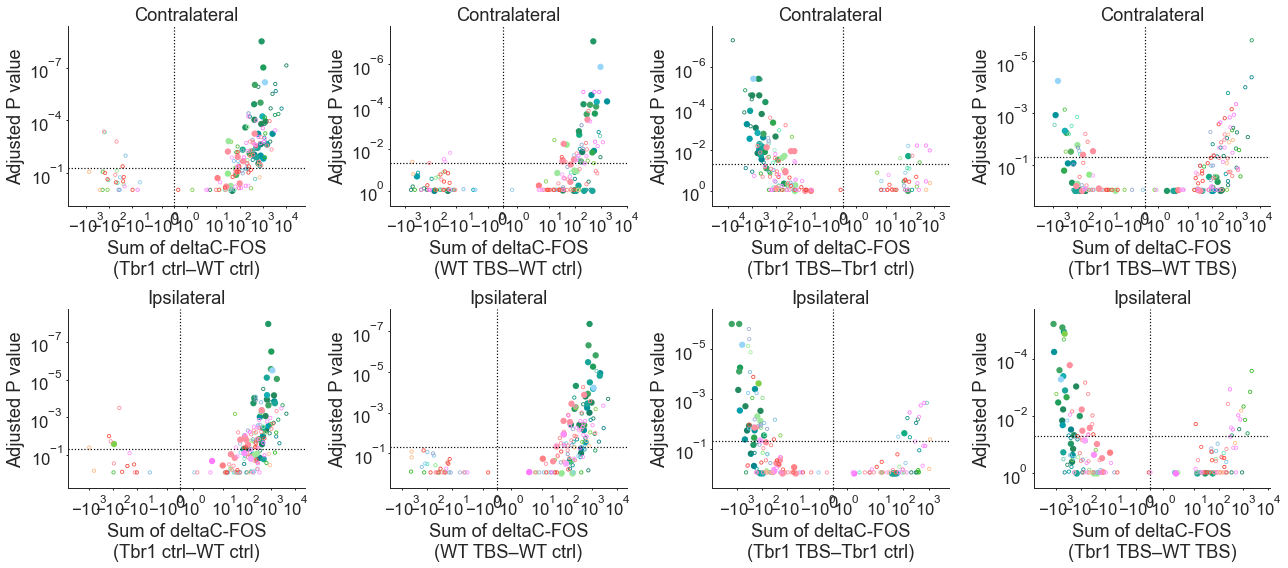

In [17]:
#plot Friedman_post_analysis results(Figure 3c scatter plots)
markers = {"Yes": "o", "No": "$\circ$"}

contra_compare_cfos_sig = Friedman_contra_compare_cfos_post_dif[Friedman_contra_compare_cfos_post_dif["Friedman_P"]<0.05]
ipsi_compare_cfos_sig = Friedman_ipsi_compare_cfos_post_dif[Friedman_ipsi_compare_cfos_post_dif["Friedman_P"]<0.05]

plt.figure (figsize = (18,8))
plt.subplot (2,4,1)
ax = sns.scatterplot (data = contra_compare_cfos_sig, 
                     x = "Tbr1 mut ctrl vs.WT ctrl",
                     y = "P WT ctrl vs.Tbr1 ctrl", 
                     hue = "structure",
                     style = "ROI correction",
                     markers = markers,
                     palette = contra_cfos_color_dict,
                     legend = False, 
                     s = 40,
                     linewidth=0)

plt.axhline(y=0.05, color='black', linestyle=':')
plt.axvline(x=0, color='black', linestyle=':')
plt.ylabel("Adjusted P value")
plt.xlabel("Sum of deltaC-FOS\n(Tbr1 ctrl–WT ctrl)")
plt.title("Contralateral")
ax.invert_yaxis()
ax.set_yscale("log")
ax.set_xscale("symlog")
ax.margins(0.1)

plt.subplot (2,4,2)
ax = sns.scatterplot (data = contra_compare_cfos_sig, 
                     x = "WT TBS vs.WT ctrl",
                     y = "P WT ctrl vs.WT TBS", 
                     hue = "structure",
                     style = "ROI correction",
                     markers = markers,
                     palette = contra_cfos_color_dict,
                     legend = False, 
                     s = 40,
                     linewidth=0)

plt.axhline(y=0.05, color='black', linestyle=':')
plt.axvline(x=0, color='black', linestyle=':')
plt.ylabel("Adjusted P value")
plt.xlabel("Sum of deltaC-FOS\n(WT TBS–WT ctrl)")
plt.title("Contralateral")
ax.invert_yaxis()
ax.set_yscale("log")
ax.set_xscale("symlog")
ax.margins(0.1)

plt.subplot (2,4,3)
ax = sns.scatterplot (data = contra_compare_cfos_sig, 
                     x = "Tbr1 mut TBS vs.Tbr1 mut ctrl",
                     y = "P Tbr1 ctrl vs.Tbr1 TBS", 
                     hue = "structure",
                     style = "ROI correction",
                     markers = markers,
                     palette = contra_cfos_color_dict,
                     legend = False, 
                     s = 40,
                     linewidth=0)

plt.axhline(y=0.05, color='black', linestyle=':')
plt.axvline(x=0, color='black', linestyle=':')
plt.ylabel("Adjusted P value")
plt.xlabel("Sum of deltaC-FOS\n(Tbr1 TBS–Tbr1 ctrl)")
plt.title("Contralateral")
ax.invert_yaxis()
ax.set_yscale("log")
ax.set_xscale("symlog")
ax.margins(0.1)

plt.subplot (2,4,4)
ax = sns.scatterplot (data = contra_compare_cfos_sig, 
                     x = "Tbr1 mut TBS vs.WT TBS",
                     y = "P WT TBS vs.Tbr1 TBS", 
                     hue = "structure",
                     style = "ROI correction",
                     markers = markers,
                     palette = contra_cfos_color_dict,
                     legend = False, 
                     s = 40,
                     linewidth=0)

plt.axhline(y=0.05, color='black', linestyle=':')
plt.axvline(x=0, color='black', linestyle=':')
plt.ylabel("Adjusted P value")
plt.xlabel("Sum of deltaC-FOS\n(Tbr1 TBS–WT TBS)")
plt.title("Contralateral")
ax.invert_yaxis()
ax.set_yscale("log")
ax.set_xscale("symlog")
ax.margins(0.1)
ax.minorticks_off()
plt.subplot (2,4,5)
ax = sns.scatterplot (data = ipsi_compare_cfos_sig, 
                     x = "Tbr1 mut ctrl vs.WT ctrl",
                     y = "P WT ctrl vs.Tbr1 ctrl", 
                     hue = "structure",
                     style = "ROI correction",
                     markers = markers,
                     palette = ipsi_cfos_color_dict,
                     legend = False, 
                     s = 40,
                     linewidth=0)

plt.axhline(y=0.05, color='black', linestyle=':')
plt.axvline(x=0, color='black', linestyle=':')
plt.ylabel("Adjusted P value")
plt.xlabel("Sum of deltaC-FOS\n(Tbr1 ctrl–WT ctrl)")
plt.title("Ipsilateral")
ax.invert_yaxis()
ax.set_yscale("log")
ax.set_xscale("symlog")
ax.margins(0.1)

plt.subplot (2,4,6)
ax = sns.scatterplot (data = ipsi_compare_cfos_sig, 
                     x = "WT TBS vs.WT ctrl",
                     y = "P WT ctrl vs.WT TBS", 
                     hue = "structure",
                     style = "ROI correction",
                     markers = markers,
                     palette = ipsi_cfos_color_dict,
                     legend = False, 
                     s = 40,
                     linewidth=0)

plt.axhline(y=0.05, color='black', linestyle=':')
plt.axvline(x=0, color='black', linestyle=':')
plt.ylabel("Adjusted P value")
plt.xlabel("Sum of deltaC-FOS\n(WT TBS–WT ctrl)")
plt.title("Ipsilateral")
ax.invert_yaxis()
ax.set_yscale("log")
ax.set_xscale("symlog")
ax.margins(0.1)

plt.subplot (2,4,7)
ax = sns.scatterplot (data = ipsi_compare_cfos_sig, 
                     x = "Tbr1 mut TBS vs.Tbr1 mut ctrl",
                     y = "P Tbr1 ctrl vs.Tbr1 TBS", 
                     hue = "structure",
                     style = "ROI correction",
                     markers = markers,
                     palette = ipsi_cfos_color_dict,
                     legend = False, 
                     s = 40,
                     linewidth=0)

plt.axhline(y=0.05, color='black', linestyle=':')
plt.axvline(x=0, color='black', linestyle=':')
plt.ylabel("Adjusted P value")
plt.xlabel("Sum of deltaC-FOS\n(Tbr1 TBS–Tbr1 ctrl)")
plt.title("Ipsilateral")
ax.invert_yaxis()
ax.set_yscale("log")
ax.set_xscale("symlog")
ax.margins(0.1)

plt.subplot (2,4,8)
ax = sns.scatterplot (data = ipsi_compare_cfos_sig, 
                     x = "Tbr1 mut TBS vs.WT TBS",
                     y = "P WT TBS vs.Tbr1 TBS", 
                     hue = "structure",
                     style = "ROI correction",
                     markers = markers,
                     palette = ipsi_cfos_color_dict,
                     legend = False, 
                     s = 40,
                     linewidth=0)

plt.axhline(y=0.05, color='black', linestyle=':')
plt.axvline(x=0, color='black', linestyle=':')
plt.ylabel("Adjusted P value")
plt.xlabel("Sum of deltaC-FOS\n(Tbr1 TBS–WT TBS)")
plt.title("Ipsilateral")
ax.invert_yaxis()
ax.set_yscale("log")
ax.set_xscale("symlog")
ax.margins(0.1)

sns.despine()
plt.tight_layout ()
plt.show()

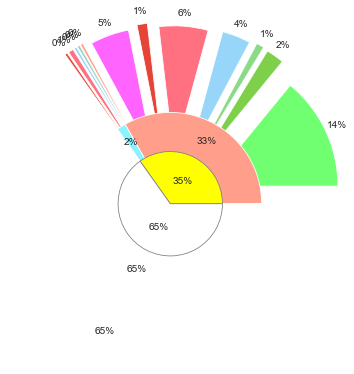

In [18]:
#plotsummary pie chart from Friedman cfos DataFrame
#Example: Figure 3c upper left panel pie chart

def summary_pie_df (df, compared_group, compared_group_diff):
    """formation of summary df for pie chart"""
    
    df_compare = df[(df["Friedman_P"]<0.05)&(df["P "+compared_group]<0.05)]
    df_compare_ratio = len(df_compare)/len(df)
    inner_dict = dict ({"P<0.05": df_compare_ratio, "P>0.05":(1-df_compare_ratio)})
    inner_df = pd.DataFrame (index = inner_dict.keys(), data = inner_dict.values(), columns = ["ratio"])
    inner_df["color"]= ["yellow", "white"]
    Tbr1_larger = df_compare[df_compare[compared_group_diff]>0]
    WT_larger = df_compare[df_compare[compared_group_diff]<0]
    Tbr1_larger_ratio = len(Tbr1_larger)/len(df)
    WT_larger_ratio = len(WT_larger)/len(df)
    middle_dict = dict({"pair dif>0":Tbr1_larger_ratio, "pair dif<0":WT_larger_ratio, "P>0.05":(1-df_compare_ratio)})
    middle_df = pd.DataFrame(index = middle_dict.keys(), data = middle_dict.values(), columns = ["ratio"])
    middle_df["color"]= ["#FF9E8B","#8BF3FF" ,"white"]
    Tbr1_larger_isocortex = len(Tbr1_larger[Tbr1_larger["ancestor_structure"]=="Isocortex"])/len(df)
    Tbr1_larger_OLF =len(Tbr1_larger[Tbr1_larger["ancestor_structure"]=="Olfactory areas"])/len(df)
    Tbr1_larger_HPF =len(Tbr1_larger[Tbr1_larger["ancestor_structure"]=="Hippocampal formation"])/len(df)
    Tbr1_larger_CTXsp =len(Tbr1_larger[Tbr1_larger["ancestor_structure"]=="Cortical subplate"])/len(df)
    Tbr1_larger_CNU =len(Tbr1_larger[Tbr1_larger["ancestor_structure"]=="Cerebral nuclei"])/len(df)
    Tbr1_larger_TH =len(Tbr1_larger[Tbr1_larger["ancestor_structure"]=="Thalamus"])/len(df)
    Tbr1_larger_HY =len(Tbr1_larger[Tbr1_larger["ancestor_structure"]=="Hypothalamus"])/len(df)
    Tbr1_larger_MB =len(Tbr1_larger[Tbr1_larger["ancestor_structure"]=="Midbrain"])/len(df)
    Tbr1_larger_HB =len(Tbr1_larger[Tbr1_larger["ancestor_structure"]=="Hindbrain"])/len(df)

    WT_larger_isocortex = len(WT_larger[WT_larger["ancestor_structure"]=="Isocortex"])/len(df)
    WT_larger_OLF =len(WT_larger[WT_larger["ancestor_structure"]=="Olfactory areas"])/len(df)
    WT_larger_HPF =len(WT_larger[WT_larger["ancestor_structure"]=="Hippocampal formation"])/len(df)
    WT_larger_CTXsp =len(WT_larger[WT_larger["ancestor_structure"]=="Cortical subplate"])/len(df)
    WT_larger_CNU =len(WT_larger[WT_larger["ancestor_structure"]=="Cerebral nuclei"])/len(df)
    WT_larger_TH =len(WT_larger[WT_larger["ancestor_structure"]=="Thalamus"])/len(df)
    WT_larger_HY =len(WT_larger[WT_larger["ancestor_structure"]=="Hypothalamus"])/len(df)
    WT_larger_MB =len(WT_larger[WT_larger["ancestor_structure"]=="Midbrain"])/len(df)
    WT_larger_HB =len(WT_larger[WT_larger["ancestor_structure"]=="Hindbrain"])/len(df)

    outter_dict = dict({"Tbr1_larger_isocortex":Tbr1_larger_isocortex,
                        "Tbr1_larger_OLF": Tbr1_larger_OLF,
                        "Tbr1_larger_HPF": Tbr1_larger_HPF,
                        "Tbr1_larger_CTXsp": Tbr1_larger_CTXsp,
                        "Tbr1_larger_CNU": Tbr1_larger_CNU,
                        "Tbr1_larger_TH": Tbr1_larger_TH,
                        "Tbr1_larger_HY": Tbr1_larger_HY,
                        "Tbr1_larger_MB": Tbr1_larger_MB,
                        "Tbr1_larger_HB":Tbr1_larger_HB,
                        "WT_larger_isocortex":WT_larger_isocortex,
                        "WT_larger_OLF": WT_larger_OLF,
                        "WT_larger_HPF": WT_larger_HPF,
                        "WT_larger_CTXsp": WT_larger_CTXsp,
                        "WT_larger_CNU":WT_larger_CNU,
                        "WT_larger_TH":WT_larger_TH,
                        "WT_larger_HY":WT_larger_HY,
                        "WT_larger_MB":WT_larger_MB,
                        "WT_larger_HB":WT_larger_HB,
                        "P>0.05": (1-df_compare_ratio)})
    outter_df = pd.DataFrame (index = outter_dict.keys(), data = outter_dict.values(), columns = ["ratio"])
    outter_df["color"] = ["#70FF71", "#9AD2BD", "#7ED04B", "#8ADA87", "#98D6F9", "#FF7080", "#E64438", "#FF64FF", "#FF9B88",
                          "#70FF71", "#9AD2BD", "#7ED04B", "#8ADA87", "#98D6F9", "#FF7080", "#E64438", "#FF64FF", "#FF9B88", "white"]
    return inner_df, middle_df, outter_df

WT_Tbr1_ctrl_contra_inner_df, WT_Tbr1_ctrl_contra_middle_df, WT_Tbr1_ctrl_contra_outter_df = summary_pie_df(Friedman_contra_compare_cfos_post_dif, "WT ctrl vs.Tbr1 ctrl", "Tbr1 mut ctrl vs.WT ctrl")

#plot pie chart
plt.figure (figsize = (6,6))
WT_Tbr1_ctrl_contra_outter_df_real = WT_Tbr1_ctrl_contra_outter_df[WT_Tbr1_ctrl_contra_outter_df["ratio"]!=0]
WT_Tbr1_ctrl_contra_outter_df_real.loc[:, "norm_ratio"] = (1-((WT_Tbr1_ctrl_contra_outter_df_real["ratio"]- WT_Tbr1_ctrl_contra_outter_df_real["ratio"].min())/(WT_Tbr1_ctrl_contra_outter_df_real["ratio"].max()- WT_Tbr1_ctrl_contra_outter_df_real["ratio"].min())))*0.4
WT_Tbr1_ctrl_contra_outter_df_real.iloc[-1,-1]=0
explodeTuple = tuple(WT_Tbr1_ctrl_contra_outter_df_real["norm_ratio"].tolist())
plt.pie(WT_Tbr1_ctrl_contra_outter_df_real["ratio"], colors = WT_Tbr1_ctrl_contra_outter_df_real["color"], autopct="%1.0f%%", pctdistance =1.1, radius = 1, explode = explodeTuple)
plt.pie(WT_Tbr1_ctrl_contra_middle_df["ratio"], colors = WT_Tbr1_ctrl_contra_middle_df["color"], autopct="%1.0f%%", pctdistance =0.8, radius = 0.7)
plt.pie(WT_Tbr1_ctrl_contra_inner_df["ratio"], colors = WT_Tbr1_ctrl_contra_inner_df["color"], autopct="%1.0f%%", pctdistance =0.5, radius = 0.4, wedgeprops={"edgecolor":"gray"})
plt.show()

In [19]:
#subset structure list for oChIEF cfos change correlation analysis

contra_oChIEF_list = Friedman_contra_compare_oChIEF_diff[Friedman_contra_compare_oChIEF_diff["Friedman_P"]<0.05]["structure"].tolist()
ipsi_oChIEF_list = Friedman_ipsi_compare_oChIEF_diff[Friedman_ipsi_compare_oChIEF_diff["Friedman_P"]<0.05]["structure"].tolist()

contra_cfos_list = Friedman_contra_compare_cfos_post_dif[Friedman_contra_compare_cfos_post_dif["Friedman_P"]<0.05]["structure"].tolist()
ipsi_cfos_list = Friedman_ipsi_compare_cfos_post_dif[Friedman_ipsi_compare_cfos_post_dif["Friedman_P"]<0.05]["structure"].tolist()

contra_compare_structure_list = [s for s in contra_oChIEF_list if s in contra_cfos_list]
contra_compare_structure_list = [s for s in structure_list_parent_v1["LABEL"].tolist() if s in contra_compare_structure_list]

ipsi_compare_structure_list = [s for s in ipsi_oChIEF_list if s in ipsi_cfos_list]
ipsi_compare_structure_list = [s for s in structure_list_parent_v1["LABEL"].tolist() if s in ipsi_compare_structure_list]

print(contra_compare_structure_list)
print(ipsi_compare_structure_list)

['SSp-m', 'VISC', 'AUD', 'AUDp', 'AUDv', 'VIS', 'VISp', 'ACA', 'ACAd', 'ACAv', 'PL', 'ORBm', 'AI', 'AId', 'AIp', 'RSPd', 'RSPv', 'TEa', 'PERI', 'ECT', 'PIR', 'COA', 'COAa', 'COAp', 'COApm', 'PAA', 'HIP', 'CA1', 'DG', 'RHP', 'ENT', 'ENTl', 'SUB', 'CLA', 'EP', 'EPd', 'LA', 'BLA', 'BLAa', 'BLAp', 'CP', 'FS', 'LSv', 'IA', 'PALm', 'MSC', 'MS', 'DORsm', 'VENT', 'GENd', 'DORpm', 'PR', 'PVT', 'RE', 'ILM', 'CM', 'SCH', 'MM', 'PH', 'LZ', 'LPO', 'PSTN', 'TU', 'ZI', 'MBsen', 'SCs', 'SCsg', 'MBmot', 'MRN', 'SCm', 'SCdg', 'PAG', 'PPN', 'PG', 'P-sat', 'PRNr']
['MO', 'MOp', 'MOs', 'VISC', 'AUD', 'AUDd', 'AUDpo', 'AUDv', 'VIS', 'ACA', 'ACAd', 'ACAv', 'PL', 'ORB', 'ORBl', 'ORBvl', 'AI', 'AId', 'AIv', 'RSPagl', 'TEa', 'PERI', 'ECT', 'NLOT', 'COAa', 'COApm', 'HIP', 'CA', 'CA1', 'CA2', 'CA3', 'DG', 'RHP', 'ENT', 'ENTl', 'BMA', 'BMAa', 'BMAp', 'CP', 'ACB', 'OT', 'LS', 'CEA', 'CEAc', 'CEAl', 'CEAm', 'IA', 'MEA', 'PALd', 'GPe', 'PALv', 'SI', 'MA', 'PALm', 'MSC', 'NDB', 'PALc', 'BST', 'DORsm', 'VENT', 'VAL', '

In [20]:
#correlation analysis of oChIEF change and cfos change
np.random.seed(17)

def cfos_difference_slice (nost_df, TBS_df):
    nost_cfos_list = []
    nost_sample_name = []
    TBS_cfos_list = []
    TBS_sample_name = []
    for a in list(np.unique(nost_df["sample_name"])):
        nost_cfos = (nost_df[nost_df["sample_name"]==a]["C-FOS_number"])
        nost_cfos_list.append(nost_cfos.tolist())
        nost_sample_name.append(a)
    for b in list(np.unique(TBS_df["sample_name"])):
        TBS_cfos = (TBS_df[TBS_df["sample_name"]==b]["C-FOS_number"])
        TBS_cfos_list.append(TBS_cfos.tolist())
        TBS_sample_name.append(b)
    dif_list = []
    for c in TBS_cfos_list:
        for d in nost_cfos_list:
            if len(c)==len(d):
                dif = np.array(c)-np.array(d)
                dif_list.append(dif)
            elif len(c)<len(d):
                dif = np.array(c)-np.array(d[:len(c)])
                dif_list.append(dif)
            elif len(c)>len(d):
                dif = np.array(c[:len(d)])-np.array(d[:len(c)])
                dif_list.append(dif)
    dif_name_list = []
    for e in TBS_sample_name:
        for f in nost_sample_name:
            dif_name = e+"-"+f
            dif_name_list.append(dif_name)
    cfos_difference = pd.DataFrame(dif_list, index = dif_name_list)
    return cfos_difference

def subset_slice_df_to_oChIEF_cfos_ctrl_TBS_dif_df (df_bin, structure_list, folder_name):
    
    folder = folder_name
    if not os.path.exists(folder):
        os.makedirs(folder)
    
    oChIEF_WT_r_P_list = []
    oChIEF_Tbr1_r_P_list=[]
    WT_Tbr1_r_P_list=[]
    oChIEF_cfos_r_P_list = []
    
    oChIEF_WT_r_list = []
    oChIEF_Tbr1_r_list=[]
    WT_Tbr1_r_list=[]
    oChIEF_cfos_r_list = []

    for structure in structure_list:
        WT_ctrl_df = df_bin[(df_bin["structure"]==structure)&(df_bin["Group"]=="WT_ctrl")]
        WT_TBS_df = df_bin[(df_bin["structure"]==structure)&(df_bin["Group"]=="WT_TBS")]
        WT_df = pd.concat ([WT_ctrl_df, WT_TBS_df])
        WT_df["genotype"]="WT"
        Tbr1_ctrl_df = df_bin[(df_bin["structure"]==structure)&(df_bin["Group"]=="Tbr1_ctrl")]
        Tbr1_TBS_df = df_bin[(df_bin["structure"]==structure)&(df_bin["Group"]=="Tbr1_TBS")]
        Tbr1_df = pd.concat ([Tbr1_ctrl_df, Tbr1_TBS_df])
        Tbr1_df["genotype"]= "Tbr1"

        WT_oChIEF_list = []
        WT_sample_name = []
        Tbr1_oChIEF_list = []
        Tbr1_sample_name = []
        for a in list(np.unique(WT_df["sample_name"])):
            WT_oChIEF = (WT_df[WT_df["sample_name"]==a]["oChIEF_total"])
            WT_oChIEF_list.append(WT_oChIEF.tolist())
            WT_sample_name.append(a)
        for b in list(np.unique(Tbr1_df["sample_name"])):
            Tbr1_oChIEF = (Tbr1_df[Tbr1_df["sample_name"]==b]["oChIEF_total"])
            Tbr1_oChIEF_list.append(Tbr1_oChIEF.tolist())
            Tbr1_sample_name.append(b)
        dif_list = []
        for c in Tbr1_oChIEF_list:
            for d in WT_oChIEF_list:
                if len(c)==len(d):
                    dif = np.array(c)-np.array(d)
                    dif_list.append(dif)
                elif len(c)<len(d):
                    dif = np.array(c)-np.array(d[:len(c)])
                    dif_list.append(dif)
                elif len(c)>len(d):
                    dif = np.array(c[:len(d)])-np.array(d[:len(c)])
                    dif_list.append(dif)
        dif_name_list = []
        for e in Tbr1_sample_name:
            for f in WT_sample_name:
                dif_name = e+"-"+f
                dif_name_list.append(dif_name)
        oChIEF_difference = pd.DataFrame(dif_list, index = dif_name_list)
        WT_cfos_difference = cfos_difference_slice (WT_ctrl_df, WT_TBS_df)
        Tbr1_cfos_difference = cfos_difference_slice (Tbr1_ctrl_df, Tbr1_TBS_df)
                
        dif_cfos_list = []
        for indexa, varaa in Tbr1_cfos_difference.iterrows():
            for indexb, varab in WT_cfos_difference.iterrows():
                Tbr1_cfos = Tbr1_cfos_difference.loc[indexa].tolist()
                WT_cfos = WT_cfos_difference.loc[indexb].tolist()
                
                if len(Tbr1_cfos)==len(WT_cfos):
                    dif_cfos = np.array(Tbr1_cfos)-np.array(WT_cfos)
                    dif_cfos_list.append(dif_cfos)
                elif len(Tbr1_cfos)<len(WT_cfos):
                    dif_cfos = np.array(Tbr1_cfos)-np.array(WT_cfos[:len(Tbr1_cfos)])
                    dif_cfos_list.append(dif_cfos)
                elif len(Tbr1_cfos)>len(WT_cfos):
                    dif_cfos = np.array(Tbr1_cfos[:len(WT_cfos)])-np.array(WT_cfos[:len(Tbr1_cfos)])
                    dif_cfos_list.append(dif_cfos)
        dif_cfos_name_list = []
        for e in Tbr1_cfos_difference.index.tolist():
            for f in WT_cfos_difference.index.tolist():
                dif_cfos_name = e+"-"+f
                dif_cfos_name_list.append(dif_cfos_name)
        cfos_difference = pd.DataFrame (dif_cfos_list, index = dif_cfos_name_list)
        
        oChIEF_difference_scale=abs(max(oChIEF_difference.max().tolist())-min(oChIEF_difference.min().tolist()))
        oChIEF_difference_n = oChIEF_difference/oChIEF_difference_scale
        oChIEF_difference_n["Group"]="oChIEF_difference"
        WT_cfos_difference_scale = abs(max(WT_cfos_difference.max().tolist())-min(WT_cfos_difference.min().tolist()))
        WT_cfos_difference_n = WT_cfos_difference/WT_cfos_difference_scale
        WT_cfos_difference_n["Group"]="WT_cfos_difference"
        Tbr1_cfos_difference_scale = abs(max(Tbr1_cfos_difference.max().tolist())-min(Tbr1_cfos_difference.min().tolist()))
        Tbr1_cfos_difference_n = Tbr1_cfos_difference/Tbr1_cfos_difference_scale
        Tbr1_cfos_difference_n["Group"]="Tbr1_cfos_difference"
        cfos_difference_scale = abs(max(cfos_difference.max().tolist())-min(cfos_difference.min().tolist()))
        cfos_difference_n = cfos_difference/cfos_difference_scale
        cfos_difference_n["Group"] = "deltadelta_cfos_difference"
        difference_df = pd.concat([oChIEF_difference_n, WT_cfos_difference_n, Tbr1_cfos_difference_n, cfos_difference_n])
        difference_real = difference_df.dropna(axis=1)
        difference_real.to_csv(folder+"/"+structure+"_difference.csv")
        
        
        oChIEF_difference_re = difference_real[difference_real["Group"]=="oChIEF_difference"].iloc[:,:-1]
        WT_cfos_difference_re = difference_real[difference_real["Group"]=="WT_cfos_difference"].iloc[:,:-1]
        Tbr1_cfos_difference_re = difference_real[difference_real["Group"]=="Tbr1_cfos_difference"].iloc[:,:-1]
        cfos_difference_re = difference_real[difference_real["Group"]=="deltadelta_cfos_difference"].iloc[:,:-1]
        
        oChIEF_difference_mean = oChIEF_difference_re.mean(axis=0)
        WT_cfos_difference_mean = WT_cfos_difference_re.mean(axis=0)
        Tbr1_cfos_difference_mean = Tbr1_cfos_difference_re.mean(axis=0)
        cfos_difference_mean = cfos_difference_re.mean(axis=0)

        oChIEF_WT_r = oChIEF_difference_mean.corr(WT_cfos_difference_mean)
        oChIEF_Tbr1_r = oChIEF_difference_mean.corr(Tbr1_cfos_difference_mean)
        WT_Tbr1_r = WT_cfos_difference_mean.corr(Tbr1_cfos_difference_mean)
        oChIEF_cfos_r = oChIEF_difference_mean.corr(cfos_difference_mean)
        
        oChIEF_WT_r_list.append(oChIEF_WT_r)
        oChIEF_Tbr1_r_list.append(oChIEF_Tbr1_r)
        WT_Tbr1_r_list.append(WT_Tbr1_r)
        oChIEF_cfos_r_list.append(oChIEF_cfos_r)
        
        perm_oChIEF_WT_r  = np.empty (1000)
        perm_oChIEF_Tbr1_r  = np.empty (1000)
        perm_WT_Tbr1_r = np.empty (1000)
        perm_oChIEF_cfos_r = np.empty (1000)

        for i in range (1000):

            oChIEF_difference_suf = oChIEF_difference_re.T.apply (lambda x: np.random.permutation(x)).T
            WT_cfos_difference_suf = WT_cfos_difference_re.T.apply (lambda y: np.random.permutation(y)).T
            Tbr1_cfos_difference_suf = Tbr1_cfos_difference_re.T.apply (lambda z: np.random.permutation(z)).T
            cfos_difference_suf = cfos_difference_re.T.apply (lambda w: np.random.permutation(w)).T

            oChIEF_difference_suf_mean = oChIEF_difference_suf.mean(axis=0)
            WT_cfos_difference_suf_mean = WT_cfos_difference_suf.mean(axis=0)
            Tbr1_cfos_difference_suf_mean = Tbr1_cfos_difference_suf.mean(axis=0)
            cfos_difference_suf_mean = cfos_difference_suf.mean(axis=0)

            perm_oChIEF_WT_r[i]=oChIEF_difference_suf_mean.corr(WT_cfos_difference_suf_mean)
            perm_oChIEF_Tbr1_r[i]=oChIEF_difference_suf_mean.corr(Tbr1_cfos_difference_suf_mean)
            perm_WT_Tbr1_r[i]=WT_cfos_difference_suf_mean.corr(Tbr1_cfos_difference_suf_mean)
            perm_oChIEF_cfos_r[i]=oChIEF_difference_suf_mean.corr(cfos_difference_suf_mean)

        oChIEF_WT_r_P = len([g for g in perm_oChIEF_WT_r if g>oChIEF_WT_r])/len(perm_oChIEF_WT_r)
        oChIEF_Tbr1_r_P = len([h for h in perm_oChIEF_Tbr1_r if h>oChIEF_Tbr1_r])/len(perm_oChIEF_Tbr1_r)
        WT_Tbr1_r_P = len([i for i in perm_WT_Tbr1_r if i>WT_Tbr1_r])/len(perm_WT_Tbr1_r)
        oChIEF_cfos_r_P = len([j for j in perm_oChIEF_cfos_r if j>oChIEF_cfos_r])/len(perm_oChIEF_cfos_r)
        
        oChIEF_WT_r_P_list.append(oChIEF_WT_r_P)
        oChIEF_Tbr1_r_P_list.append(oChIEF_Tbr1_r_P)
        WT_Tbr1_r_P_list.append(WT_Tbr1_r_P)
        oChIEF_cfos_r_P_list.append(oChIEF_cfos_r_P)
        
    difference_summary = pd.DataFrame ([oChIEF_WT_r_list, oChIEF_WT_r_P_list, oChIEF_Tbr1_r_list, oChIEF_Tbr1_r_P_list, WT_Tbr1_r_list, WT_Tbr1_r_P_list, oChIEF_cfos_r_list, oChIEF_cfos_r_P_list],
                                       index =  ["oChIEF_WT_r", "oChIEF_WT_r_P", "oChIEF_Tbr1_r", "oChIEF_Tbr1_r_P", "WT_Tbr1_r", "WT_Tbr1_r_P", "oChIEF_cfos_r", "oChIEF_cfos_P"], 
                                       columns =structure_list)
    return difference_summary.T


contra_difference_summary = subset_slice_df_to_oChIEF_cfos_ctrl_TBS_dif_df (contra_compare_bin_shrink, contra_compare_structure_list, "contra_oChIEF_cfos_correlation")
ipsi_difference_summary = subset_slice_df_to_oChIEF_cfos_ctrl_TBS_dif_df (ipsi_compare_bin_shrink, ipsi_compare_structure_list, "ipsi_oChIEF_cfos_correlation")

contra_difference_summary.to_csv("contra_difference_summary.csv")
ipsi_difference_summary.to_csv("ipsi_difference_summary.csv")

In [23]:
#add information to difference_correlation DataFrame
contra_difference_summary["structure"]=contra_difference_summary.index.tolist()
ipsi_difference_summary["structure"]=ipsi_difference_summary.index.tolist()

#format color dict
def structure_color_dict (df):
    """construct structure color map"""
    cfos_structure_list = list(df["structure"])
    label_list = list(structure_list_parent_v1["LABEL"])
    label_dict = {si : i for i,si in enumerate(label_list)}
    index_list = list(itemgetter(*cfos_structure_list)(label_dict))
    color_list = structure_list_parent_v1.iloc[index_list][['-R-','-G-','-B-']]
    color_tuple = [tuple(x) for x in color_list.to_numpy()]
    color_code = ['#%02x%02x%02x' % (x) for x in color_tuple]
    structure_zip = zip(cfos_structure_list, color_code)
    structure_dict = dict(structure_zip)
    
    return structure_dict
contra_color_dict = structure_color_dict (contra_difference_summary)
ipsi_color_dict = structure_color_dict (ipsi_difference_summary)

#add ROI correction
structure_list_L = ["LA", "BLA", "amc", "VISam", "CP", "AI", "VISC", "ORBvl", "TEa", "AIp", "ORBl", "ACAd", "BLAa",
                    "AUD", "ACAv", "PL", "ILA", "RSPv", "RSPd", "RSPagl", "VISa", "MOs", "SSp-tr", "SSp-ll", "act", "ORBm", "PP",
                    "CM", "RH", "PCN", "PF", "CL", "PIL", "AUDd", "AUDv", "PVpo",
                    "RSP", "ORB", "ACA", "ILM", "AId", "VTA", "RE", "BLAp"]

structure_list_R = ["LA", "BLA", "ORBvl", "PBG", "SAG", "FRP", "APr", "VISam", "scp", "CP", "AI", "VISC", "TEa", "AIp", "ORBl", "ACAd", "BLAa",
                    "AUD", "ORBm", "ACAv", "PL", "ILA", "RSPv", "RSPd", "RSPagl", "VISa", "MOs", "SSp-tr", "SSp-ll", "PPN", "PP", "RCH", "ORBm",
                    "CM", "RH", "PCN", "PF", "CL", "PIL", "AUDd", "AUDv", "DG", "VTA",
                    "RSP", "ORB", "ACA", "ILM", "AId", "PVpo", "RE"]

contra_difference_summary["ROI correction"]="No"
ipsi_difference_summary["ROI correction"]="No"

for a in contra_difference_summary.index:
    if a in structure_list_L:
        contra_difference_summary.loc[a, "ROI correction"]="Yes"

for b in ipsi_difference_summary.index:
    if b in structure_list_R:
        ipsi_difference_summary.loc[b, "ROI correction"]="Yes"

In [32]:
#check tendency of oChIEF cfos correlations

#subset difference correlation 
contra_difference_summary_sig = contra_difference_summary[(contra_difference_summary["oChIEF_cfos_P"]<0.05)|(contra_difference_summary["oChIEF_cfos_P"]>0.95)]
ipsi_difference_summary_sig = ipsi_difference_summary[(ipsi_difference_summary["oChIEF_cfos_P"]<0.05)|(ipsi_difference_summary["oChIEF_cfos_P"]>0.95)]

contra_difference_summary_sig_positive = contra_difference_summary_sig[(contra_difference_summary_sig["oChIEF_cfos_r"]>0.1)&(contra_difference_summary_sig["oChIEF_cfos_P"]<0.05)]
contra_difference_summary_sig_negative = contra_difference_summary_sig[(contra_difference_summary_sig["oChIEF_cfos_r"]<-0.1)&(contra_difference_summary_sig["oChIEF_cfos_P"]>0.95)]
ipsi_difference_summary_sig_positive = ipsi_difference_summary_sig[(ipsi_difference_summary_sig["oChIEF_cfos_r"]>0.1)&(ipsi_difference_summary_sig["oChIEF_cfos_P"]<0.05)]
ipsi_difference_summary_sig_negative = ipsi_difference_summary_sig[(ipsi_difference_summary_sig["oChIEF_cfos_r"]<-0.1)&(ipsi_difference_summary_sig["oChIEF_cfos_P"]>0.95)]

contra_difference_summary_sig_positive_list = contra_difference_summary_sig_positive["structure"].tolist()
contra_difference_summary_sig_negative_list = contra_difference_summary_sig_negative["structure"].tolist()
ipsi_difference_summary_sig_positive_list = ipsi_difference_summary_sig_positive["structure"].tolist()
ipsi_difference_summary_sig_negative_list = ipsi_difference_summary_sig_negative["structure"].tolist()

#subset adjusted difference structure
contra_posthoc_difference_list = Friedman_contra_compare_cfos_post_dif[(Friedman_contra_compare_cfos_post_dif["P WT ctrl vs.WT TBS"]<0.05)|(Friedman_contra_compare_cfos_post_dif["P Tbr1 ctrl vs.Tbr1 TBS"]<0.05)]["structure"].tolist()
ipsi_posthoc_difference_list = Friedman_ipsi_compare_cfos_post_dif[(Friedman_ipsi_compare_cfos_post_dif["P WT ctrl vs.WT TBS"]<0.05)|(Friedman_ipsi_compare_cfos_post_dif["P Tbr1 ctrl vs.Tbr1 TBS"]<0.05)]["structure"].tolist()

def tendency_oChIEF_cfos_positive_perm (correlation_folder, structure_list):
    real_list = []
    for a in structure_list:
        difference_df = pd.read_csv (correlation_folder+"/"+a+"_difference.csv", index_col = 0)
        oChIEF_difference = difference_df[difference_df["Group"]=="oChIEF_difference"].iloc[:,:-1]
        cfos_difference = difference_df[difference_df["Group"]=="deltadelta_cfos_difference"].iloc[:,:-1]
        perm_oChIEF = []
        perm_cfos = []
        for i in range (1000):
            oChIEF_difference_suf = oChIEF_difference.T.apply (lambda x: np.random.permutation(x)).T
            cfos_difference_suf = cfos_difference.T.apply (lambda y: np.random.permutation(y)).T
            perm_oChIEF.append(oChIEF_difference_suf.mean(axis=0).tolist())
            perm_cfos.append(cfos_difference_suf.mean(axis=0).tolist())
        pd_perm_oChIEF = pd.DataFrame(perm_oChIEF)
        pd_perm_cfos = pd.DataFrame(perm_cfos)

        if np.mean(pd_perm_oChIEF.mean (axis=0))<0:
            oChIEF_threshold = np.mean(pd_perm_oChIEF.apply(lambda z: np.percentile(z, 1)))
        elif np.mean(pd_perm_oChIEF.mean (axis=0))>0:
            oChIEF_threshold = np.mean(pd_perm_oChIEF.apply(lambda z: np.percentile(z, 99)))
    
        if np.mean(pd_perm_cfos.mean (axis=0))<0:
            cfos_threshold = np.mean(pd_perm_cfos.apply(lambda w: np.percentile(w, 1)))
        elif np.mean(pd_perm_cfos.mean (axis=0))>0:
            cfos_threshold = np.mean(pd_perm_cfos.apply(lambda w: np.percentile(w, 99)))
        if oChIEF_threshold*cfos_threshold >0:
            real_list.append(a)
    return real_list

def tendency_oChIEF_cfos_negative_perm(correlation_folder, structure_list):
    real_list = []
    for a in structure_list:
        difference_df = pd.read_csv (correlation_folder+"/"+a+"_difference.csv", index_col = 0)
        oChIEF_difference = difference_df[difference_df["Group"]=="oChIEF_difference"].iloc[:,:-1]
        cfos_difference = difference_df[difference_df["Group"]=="deltadelta_cfos_difference"].iloc[:,:-1]
        perm_oChIEF = []
        perm_cfos = []
        for i in range (1000):
            oChIEF_difference_suf = oChIEF_difference.T.apply (lambda x: np.random.permutation(x)).T
            cfos_difference_suf = cfos_difference.T.apply (lambda y: np.random.permutation(y)).T
            perm_oChIEF.append(oChIEF_difference_suf.mean(axis=0).tolist())
            perm_cfos.append(cfos_difference_suf.mean(axis=0).tolist())
        pd_perm_oChIEF = pd.DataFrame(perm_oChIEF)
        pd_perm_cfos = pd.DataFrame(perm_cfos)

        if np.mean(pd_perm_oChIEF.mean (axis=0))<0:
            oChIEF_threshold = np.mean(pd_perm_oChIEF.apply(lambda z: np.percentile(z, 1)))
        elif np.mean(pd_perm_oChIEF.mean (axis=0))>0:
            oChIEF_threshold = np.mean(pd_perm_oChIEF.apply(lambda z: np.percentile(z, 99)))
    
        if np.mean(pd_perm_cfos.mean (axis=0))<0:
            cfos_threshold = np.mean(pd_perm_cfos.apply(lambda w: np.percentile(w, 1)))
        elif np.mean(pd_perm_cfos.mean (axis=0))>0:
            cfos_threshold = np.mean(pd_perm_cfos.apply(lambda w: np.percentile(w, 99)))
        if oChIEF_threshold*cfos_threshold <0:
            real_list.append(a)
    return real_list

contra_difference_summary_sig_positive_list_real = tendency_oChIEF_cfos_positive_perm ("contra_oChIEF_cfos_correlation", contra_difference_summary_sig_positive_list)
contra_difference_summary_sig_negative_list_real = tendency_oChIEF_cfos_negative_perm ("contra_oChIEF_cfos_correlation", contra_difference_summary_sig_negative_list)
ipsi_difference_summary_sig_positive_list_real = tendency_oChIEF_cfos_positive_perm ("ipsi_oChIEF_cfos_correlation", ipsi_difference_summary_sig_positive_list)
ipsi_difference_summary_sig_negative_list_real = tendency_oChIEF_cfos_negative_perm ("ipsi_oChIEF_cfos_correlation", ipsi_difference_summary_sig_negative_list)

contra_difference_p = [s for s in contra_difference_summary_sig_positive_list_real if s in contra_posthoc_difference_list]
contra_difference_n = [s for s in contra_difference_summary_sig_negative_list_real if s in contra_posthoc_difference_list]
ipsi_difference_p = [s for s in ipsi_difference_summary_sig_positive_list_real if s in ipsi_posthoc_difference_list]
ipsi_difference_n = [s for s in ipsi_difference_summary_sig_negative_list_real if s in ipsi_posthoc_difference_list]

print(contra_difference_p)
print(contra_difference_n)
print(ipsi_difference_p)
print(ipsi_difference_n)

['AUD', 'AUDp', 'AIp', 'PIR', 'BLA', 'MBsen']
['DORsm', 'VENT', 'ILM']
['HIP', 'NOT']
['MOp', 'AUDd', 'ACA', 'ACAv', 'TEa', 'MEA', 'PALv', 'SI', 'PALc', 'BST', 'DORsm', 'DORpm', 'CL', 'LZ', 'VTA', 'SCdg']


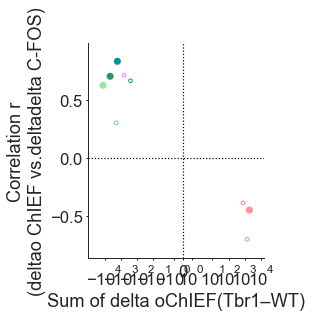

In [37]:
#plot correlation between delta oChIEF and deltadelta C-FOS versus delta oChIEF
#Example:Figure 4a left panel

contra_difference_summary_sig_positive_real = contra_difference_summary_sig_positive[contra_difference_summary_sig_positive["structure"].isin(contra_difference_p)]
contra_difference_summary_sig_negative_real = contra_difference_summary_sig_negative[contra_difference_summary_sig_negative["structure"].isin(contra_difference_n)]
ipsi_difference_summary_sig_positive_real = ipsi_difference_summary_sig_positive[ipsi_difference_summary_sig_positive["structure"].isin(ipsi_difference_p)]
ipsi_difference_summary_sig_negative_real = ipsi_difference_summary_sig_negative[ipsi_difference_summary_sig_negative["structure"].isin(ipsi_difference_n)]

contra_difference_summary_sig_positive_real["Delta oChIEF(Tbr1 - WT)"]= Friedman_contra_compare_oChIEF_diff[Friedman_contra_compare_oChIEF_diff["structure"].isin(contra_difference_p)]["pair diff Tbr1–WT"].tolist()
contra_difference_summary_sig_negative_real["Delta oChIEF(Tbr1 - WT)"]= Friedman_contra_compare_oChIEF_diff[Friedman_contra_compare_oChIEF_diff["structure"].isin(contra_difference_n)]["pair diff Tbr1–WT"].tolist()
ipsi_difference_summary_sig_positive_real["Delta oChIEF(Tbr1 - WT)"]= Friedman_ipsi_compare_oChIEF_diff[Friedman_ipsi_compare_oChIEF_diff["structure"].isin(ipsi_difference_p)]["pair diff Tbr1–WT"].tolist()
ipsi_difference_summary_sig_negative_real["Delta oChIEF(Tbr1 - WT)"]= Friedman_ipsi_compare_oChIEF_diff[Friedman_ipsi_compare_oChIEF_diff["structure"].isin(ipsi_difference_n)]["pair diff Tbr1–WT"].tolist()

contra_correlation = pd.concat ([contra_difference_summary_sig_positive_real, contra_difference_summary_sig_negative_real])
ipsi_correlation = pd.concat ([ipsi_difference_summary_sig_positive_real, ipsi_difference_summary_sig_negative_real])

#plot figure
markers = {"Yes": "o", "No": "$\circ$"}
plt.figure (figsize = (4,4))
sns.scatterplot (data = contra_correlation, 
                     x = "Delta oChIEF(Tbr1 - WT)",
                     y = "oChIEF_cfos_r", 
                     hue = "structure",
                     style = "ROI correction",
                     markers = markers,
                     palette = contra_color_dict,
                     legend = False, 
                     s = 50,
                     linewidth=0)
plt.axhline(y=0, color='black', linestyle=':')
plt.axvline(x=0, color='black', linestyle=':')
plt.xlabel("Sum of delta oChIEF(Tbr1–WT)")
plt.ylabel("Correlation r\n(deltao ChIEF vs.deltadelta C-FOS)")
plt.xscale("symlog")
plt.margins(0.1)
sns.despine()
plt.tight_layout ()
plt.show()

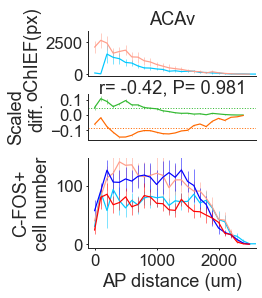

In [44]:
#plot oChIEF and C-FOS difference and their correlations in indvidual regions
#Example:Figure 4d ACAv

np.random.seed(17)

def plot_oChIEF_cfos_difference (df, scale_level, correlation_folder, difference_summary, structure):
    
    df_copy = df.copy()
    df_copy.drop(["sample_name"], axis = 1, inplace = True)
    WT_ctrl_contra_compare = df_copy[df_copy["Group"]=="WT_ctrl"]
    Tbr1_ctrl_contra_compare = df_copy[df_copy["Group"]=="Tbr1_ctrl"]
    WT_TBS_contra_compare = df_copy[df_copy["Group"]=="WT_TBS"]
    Tbr1_TBS_contra_compare = df_copy[df_copy["Group"]=="Tbr1_TBS"]
    WT_contra_compare = pd.concat ([WT_ctrl_contra_compare, WT_TBS_contra_compare])
    Tbr1_contra_compare = pd.concat ([Tbr1_ctrl_contra_compare, Tbr1_TBS_contra_compare])    
    def binning_reset_z (df_u, structure_u, scale_level_u):
        """binning C-fos density data in z axis and reset the most posterior z to zero"""
        df_sub = df_u[df_u["structure"]== structure_u]
        df_sub["slice_number"]//=scale_level_u
        df_sub["slice_number"]*=scale_level_u
        df_sub["slice_number"]= df_sub["slice_number"]-df_sub["slice_number"].min()
        df_sub_group = df_sub.groupby(["slice_number"])
        mean = df_sub_group.mean()["C-FOS_number"].tolist()
        sem = df_sub_group.std()["C-FOS_number"]/np.sqrt(df_sub_group.size())

        return df_sub, df_sub_group, mean, sem

    def binning_reset_z_oChIEF (df_u, structure_u, scale_level_u):
        """binning C-fos density data in z axis and reset the most posterior z to zero"""
        df_sub = df_u[df_u["structure"]== structure_u]
        df_sub["slice_number"]//=scale_level_u
        df_sub["slice_number"]*=scale_level_u
        df_sub["slice_number"]= df_sub["slice_number"]-df_sub["slice_number"].min()
        df_sub_group = df_sub.groupby(["slice_number"])
        mean = df_sub_group.mean()["oChIEF_total"].tolist()
        sem = df_sub_group.std()["oChIEF_total"]/np.sqrt(df_sub_group.size())

        return df_sub, df_sub_group, mean, sem

    fig = plt.figure (figsize = (3,4))
    ax = plt.gca()

    WT_ctrl_bin, WT_ctrl_group, WT_ctrl_mean, WT_ctrl_sem = binning_reset_z (WT_ctrl_contra_compare, structure, scale_level)
    Tbr1_ctrl_bin, Tbr1_ctrl_group, Tbr1_ctrl_mean, Tbr1_ctrl_sem = binning_reset_z (Tbr1_ctrl_contra_compare, structure, scale_level)
    WT_TBS_bin, WT_TBS_group, WT_TBS_mean, WT_TBS_sem = binning_reset_z (WT_TBS_contra_compare, structure, scale_level)
    Tbr1_TBS_bin, Tbr1_TBS_group, Tbr1_TBS_mean, Tbr1_TBS_sem = binning_reset_z (Tbr1_TBS_contra_compare, structure, scale_level)
    WT_bin, WT_group, WT_mean, WT_sem = binning_reset_z_oChIEF (WT_contra_compare, structure, scale_level)
    Tbr1_bin, Tbr1_group, Tbr1_mean, Tbr1_sem = binning_reset_z_oChIEF (Tbr1_contra_compare, structure, scale_level)
    
    difference_df = pd.read_csv (correlation_folder+"/"+structure+"_difference.csv", index_col = 0)

    oChIEF_difference = difference_df[difference_df["Group"]=="oChIEF_difference"].iloc[:,:-1]
    cfos_difference = difference_df[difference_df["Group"]=="deltadelta_cfos_difference"].iloc[:,:-1]

    x = np.arange(len(oChIEF_difference.mean(axis=0).T))
    oChIEF_mean = oChIEF_difference.mean(axis=0)
    oChIEF_sem = oChIEF_difference.std(axis=0)/np.sqrt(len(oChIEF_difference))
    cfos_mean = cfos_difference.mean(axis=0)
    cfos_sem = cfos_difference.std(axis=0)/np.sqrt(len(cfos_difference))

    perm_oChIEF = []
    perm_cfos = []
    for i in range (1000):
        oChIEF_difference_suf = oChIEF_difference.T.apply (lambda x: np.random.permutation(x)).T
        cfos_difference_suf = cfos_difference.T.apply (lambda y: np.random.permutation(y)).T
        perm_oChIEF.append(oChIEF_difference_suf.mean(axis=0).tolist())
        perm_cfos.append(cfos_difference_suf.mean(axis=0).tolist())
    pd_perm_oChIEF = pd.DataFrame(perm_oChIEF)
    pd_perm_cfos = pd.DataFrame(perm_cfos)

    if np.mean(pd_perm_oChIEF.mean (axis=0))<0:
        oChIEF_threshold = np.mean(pd_perm_oChIEF.apply(lambda z: np.percentile(z, 1)))
    elif np.mean(pd_perm_oChIEF.mean (axis=0))>0:
        oChIEF_threshold = np.mean(pd_perm_oChIEF.apply(lambda z: np.percentile(z, 99)))
    
    if np.mean(pd_perm_cfos.mean (axis=0))<0:
        cfos_threshold = np.mean(pd_perm_cfos.apply(lambda w: np.percentile(w, 1)))
    elif np.mean(pd_perm_cfos.mean (axis=0))>0:
        cfos_threshold = np.mean(pd_perm_cfos.apply(lambda w: np.percentile(w, 99)))

    inner = gridspec.GridSpec (3,1, height_ratios = [0.25, 0.25, 0.5],hspace=0.3)
    ax1 = plt.subplot (inner[0])
    ax1.errorbar ((WT_group.size().index)*10, WT_mean, yerr = WT_sem, 
                    fmt="-", color = "#00C8FF", label = "WT", elinewidth = 0.5)
    ax1.errorbar ((Tbr1_group.size().index)*10, Tbr1_mean, yerr = Tbr1_sem, 
                    fmt="-", color = "#FF9E8B", label = "Tbr1", elinewidth = 0.5)
    ax1.set_ylabel ("oChIEF(px)")
    ax1.yaxis.set_label_position("left")
    ax1.set_title(structure)
    ax1.set_xticks([])
    ax1.set_xlim(-100, max((Tbr1_group.size().index)*10)+100)
    fig.add_subplot(ax1)
    ax2 = plt.subplot (inner[1])
    ax2.errorbar (x*100, oChIEF_mean, oChIEF_sem, color = "#33B932", elinewidth = 0.5)
    ax2.axhline(y = oChIEF_threshold, color = "#33B932", linewidth=1, linestyle = ":")
    ax2.errorbar (x*100, cfos_mean, cfos_sem, color = "#FF6900", elinewidth = 0.5)
    ax2.axhline(y = cfos_threshold, color = "#FF6900", linewidth=1, linestyle = ":")
    ax2.set_ylabel ("Scaled\ndiff.")
    ax2.set_xticks([])
    ax2.set_xlim(-100, max((Tbr1_group.size().index)*10)+100)
    ax2.set_title("r= "+str (difference_summary.loc[structure, "oChIEF_cfos_r"].round(2))+", P= "+str(difference_summary.loc[structure, "oChIEF_cfos_P"]), y = 0.9)
    fig.add_subplot(ax2)
    ax3 = plt.subplot(inner[2])
    ax3.errorbar ((WT_ctrl_group.size().index)*10, WT_ctrl_mean, yerr = WT_ctrl_sem, 
                    fmt="-", color = "#00C8FF", label = "WT_ctrl", elinewidth = 0.5)
    ax3.errorbar ((Tbr1_ctrl_group.size().index)*10, Tbr1_ctrl_mean, yerr = Tbr1_ctrl_sem, 
                    fmt="-", color = "#FF9E8B", label = "Tbr1_ctrl", elinewidth = 0.5)
    ax3.errorbar ((WT_TBS_group.size().index)*10, WT_TBS_mean, yerr = WT_TBS_sem, 
                    fmt="-", color = "#0000FF", label = "WT_TBS", elinewidth = 0.5)
    ax3.errorbar ((Tbr1_TBS_group.size().index)*10, Tbr1_TBS_mean, yerr = Tbr1_TBS_sem, 
                    fmt="-", color = "#FF0000", label = "Tbr1_TBS", elinewidth = 0.5)
    ax3.set_xlim(-100, max((Tbr1_group.size().index)*10)+100)
    ax3.set_xlabel ("AP distance (um)")
    ax3.set_ylabel ("C-FOS+\ncell number")           
    fig.add_subplot(ax3)
    sns.despine()
    plt.tight_layout()
    plt.savefig(correlation_folder+"/"+structure+"_plot.pdf")
    plt.show()

plot_oChIEF_cfos_difference (ipsi_compare_bin_shrink, 10, "ipsi_oChIEF_cfos_correlation", ipsi_difference_summary_sig_negative_real, "ACAv")